#  **TITANIC: EDA & SURVIVAL PREDICTION**
## **Introduction**

The sinking of the RMS Titanic is one of the most tragic maritime disasters in history, claiming over 1,500 lives in April 1912. The Titanic dataset provides a compelling glimpse into this event, containing demographic and voyage information on passengers, which has become a foundational dataset for data science and machine learning exploration. This project aims to perform an exploratory data analysis (EDA) to uncover insights into the factors that might have influenced the chances of survival. Following the EDA, we will develop a model to predict survival outcomes for the passengers. Through statistical analysis, visualization, and machine learning techniques, we endeavor to understand the underlying patterns that could explain the survival rates among different groups of passengers. This project not only serves as a poignant reminder of the Titanic tragedy but also as an opportunity to apply data science methods to derive meaningful conclusions from historical data.

## **Dataset**

### **Overview**

The Titanic dataset is divided into two sets:

- **training set (train.csv):** Used to build machine learning models. The outcome (survival) for each passenger is provided.
- **test set (test.csv):** Used to evaluate the model on unseen data. The survival outcome is not provided and must be predicted.

Additionally, **gender_submission.csv** is included as an example submission file, predicting survival based on gender.

### **Data Dictionary**

| Variable | Definition                     | Key                                          |
|----------|--------------------------------|----------------------------------------------|
| survival | Survival                       | 0 = No, 1 = Yes                              |
| pclass   | Ticket class                   | 1 = 1st, 2 = 2nd, 3 = 3rd                    |
| sex      | Sex                            |                                              |
| Age      | Age in years                   |                                              |
| sibsp    | # of siblings / spouses aboard |                                              |
| parch    | # of parents / children aboard |                                              |
| ticket   | Ticket number                  |                                              |
| fare     | Passenger fare                 |                                              |
| cabin    | Cabin number                   |                                              |
| embarked | Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |

### **Variable Notes**

- **pclass:** A proxy for socio-economic status (SES) with 1st indicating Upper class, 2nd Middle class, and 3rd Lower class.
- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.
- **sibsp:** Defines family relations as follows: Sibling includes brother, sister, stepbrother, stepsister. Spouse includes husband, wife (mistresses and fiancés were ignored).
- **parch:** Defines family relations as follows: Parent includes mother, father. Child includes daughter, son, stepdaughter, stepson. Note that some children traveled only with a nanny, making parch=0 for them.


## **Load, Clean and Transform Data**
### **First exploration**

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
from warnings import simplefilter

# Filter FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Ignore all warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

In [333]:
# Read the training data from CSV file
df_train = pd.read_csv("../data/train.csv")

# Read the test data from CSV file
df_test = pd.read_csv("../data/test.csv")

# Read the gender submission data from CSV file
df_gender = pd.read_csv("../data/gender_submission.csv")

# Display the first few rows of the training data
display(df_train.head())

# Optionally display the first few rows of the test and gender submission data
# display(df_test.head())
# display(df_gender.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Regarding the data type and values, here's what we can observe by a first exploration of the dataset:

- **Data Type:** Most columns appear to have appropriate data types, such as integers for "PassengerId", "Survived", "Pclass", "SibSp", and "Parch", floating-point numbers for "Age" and "Fare", and strings for "Name", "Sex", "Ticket", "Cabin", and "Embarked".

- **Values:** The values in the columns seem meaningful, for instance, numerical values for age and ticket fare, categorical values for gender and embarkation port, and alphanumeric values for name and ticket number.

- **Missing Values:** There are missing values present in the "Age", "Cabin", and "Embarked" columns, indicated by "NaN". These missing values may need to be addressed, either through imputation (i.e., replacing them with substitute values) or by removing the corresponding rows/columns, depending on the analysis to be conducted.

Let`s take a closer look on that:

In [334]:
# Print information about the training data
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


From the info we can get the following insights:

- **Data Types:** Most columns have appropriate data types, such as integers for "PassengerId", "Survived", "Pclass", "SibSp", and "Parch", floating-point numbers for "Age" and "Fare", and strings for "Name", "Sex", "Ticket", "Cabin", and "Embarked". We may need to consider transforming some categorical variables into a suitable format for analysis, such as one-hot encoding for "Sex" and "Embarked".

- **Missing Values:** The columns "Age", "Cabin", and "Embarked" contain missing values, with "Age" having the most significant number of missing entries.
Strategies for handling missing values could include imputation methods for "Age" based on mean or median values, while columns with a high proportion of missing values, like "Cabin", might be dropped entirely, depending on their relevance to the analysis.

### **Unique Values**

The unique value counts of the dataset columns informs us about several aspects of data preparation and analysis:

#### **Data Cleaning**
- **High Cardinality**: PassengerId, Name, and Ticket may be dropped as they are unique to each passenger and don't generally contribute to predictive models.
- **Cabin Complexity**: With 147 unique values, Cabin might require cleaning or feature engineering to be useful.

#### **Transformation**
- **Categorical Encoding**: Survived, Pclass, Sex, and Embarked should be encoded properly for modeling.
- **Numerical Treatment**: Normalize or bin Age, SibSp, Parch, and Fare as needed.

#### **Analysis**
- **Age Binning**: Consider age group analysis for the Age variable with 88 unique values.
- **Group-Based Insights**: Low cardinality in Survived, Pclass, and Embarkedma kes them suitable for group-wise statistical analysis.

#### **Modeling**
- **Target Variable**: Survived is binary and can be used directly as a target variable.
- **Ordinal Features**: Pclass is ordinal and might benefit from ordinal encoding.
- **Overfitting Risk**: Ticket and Cabin might cause overfitting if used without modification.
- **Feature Scaling**: Fare and Age might need scaling due to their range of values.


In [335]:
# Calculate the number of unique values in each column
unique_values_count = df_train.nunique()

# Display the result
unique_values_count


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### **Descriptive Statistics**

From the follwoing statistical information, we can gain the more insights:

- **Survival Rate:** Approximately 38.4% of passengers survived, based on the data in the "Survived" column.

- **Class Distribution:** The majority of passengers (over 50%) traveled in third class (Pclass=3).

- **Age Distribution:** The average age of passengers is approximately 29.7 years, with a standard deviation of 14.5 years. The youngest passenger was less than 1 year old (0.42 years), while the oldest passenger was 80 years old.

- **Family Relations:** Most passengers traveled without siblings/spouses (SibSp) or parents/children (Parch), as indicated by the low quartiles (25%) and median values (50%) in these columns.

- **Ticket Prices:** Ticket prices vary widely, with the lowest price at 0 and the highest at 512.33. The average price is approximately 32.20, but the 75th percentile is only at 31, indicating that prices are highly distributed, and some passengers paid very high prices.

In [336]:
# Generate descriptive statistics for the training data
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In terms of modeling, we can already gain the following insights:

- **For machine learning:** The variables could be preprocessed differently. Pclass is categorical and should be treated accordingly, for example, by using one-hot encoding. Age, SibSp, Parch, and Fare are continuous and could benefit from normalization or standardization, especially since Fare has a very skewed distribution.

- **Outlier detection:** Outliers in Age and especially in Fare could affect model performance. It might be worth considering whether these outliers should be removed or capped using an appropriate method.

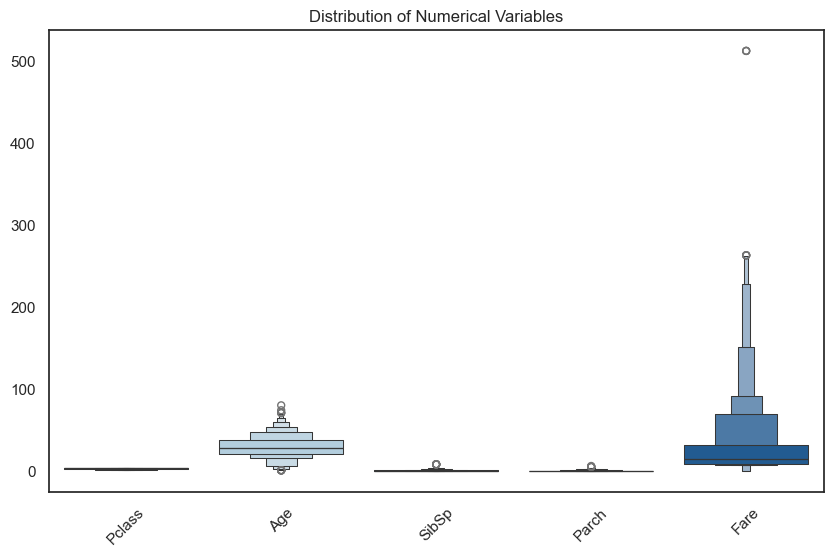

In [337]:
# Selecting only numeric columns for the boxenplot
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Survived')
numeric_columns.remove('PassengerId') 

# Creating the boxenplot using only numeric columns
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_train[numeric_columns], palette="Blues")
plt.xticks(rotation=45)
plt.title('Distribution of Numerical Variables')
plt.show()

### **Missing Values**
#### **Cabin**

The limited number of entries in the cabin column of the Titanic dataset is primarily due to incomplete records and the chaos during the disaster. Here's a summarized explanation:

- **Incomplete Records:** Many passenger records were lost or never fully documented. The emergency situation prioritized saving lives over maintaining detailed records.
- **Third Class Passengers:** From other sources we know, that a significant number of passengers traveled in third class, where cabin assignments were less structured and poorly documented compared to first and second classes.
- **Post-Disaster Documentation:** Some cabin records were compiled after the disaster from survivor accounts or booking records, leading to incomplete information.

Thus, the sparse data in the cabin column reflects the historical context of the Titanic disaster, with a focus on immediate survival rather than detailed record-keeping. However, due to the high amount of missing values, we drop this column.

In [338]:
# Grouping missing values by passenger class
missing_cabin_by_pclass = df_train[df_train['Cabin'].isnull()].groupby('Pclass').size()

# Displaying the grouped values
print("Number of missing values in 'Cabin' column grouped by Passenger Class:")
print(missing_cabin_by_pclass)

# Dropping 'Cabin' and 'PassengerId' columns from the training data
df_train = df_train.drop(['Cabin', 'PassengerId'], axis=1)


Number of missing values in 'Cabin' column grouped by Passenger Class:
Pclass
1     40
2    168
3    479
dtype: int64


#### **Embarked**

In [339]:
# Displaying rows with missing values in 'Embarked'
missing_embarked = df_train[df_train['Embarked'].isna()]
missing_embarked


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


When we filter the rows of two the Titanic passengers with missing values in the 'Embarked'-Column, several insights and inferences can be drawn:

- **Shared Ticket Number:** Both passengers, Miss Amelie Icard and Mrs. George Nelson (Martha Evelyn) Stone, share the same ticket number ("113572") and fare (80.0), suggesting they might have been traveling together. This could indicate a familial relationship or companionship, especially since they both belonged to the first class.

- **Survival Status:** Both passengers survived (Survived = 1), raising interesting questions about the factors that might have contributed to their survival. Being in the first class, they might have had easier access to lifeboats, aligning with known survival patterns on the Titanic.

- **Age and Social Status:** The ages of the passengers vary (38 and 62 years), and both are classified as "Commoner," suggesting that despite traveling in first class, they did not have a noble title or a particular social status. Their titles ("Miss" and "Mrs.") also provide information about their marital status; "Miss" suggests an unmarried woman, while "Mrs." indicates a married woman.

- **Gender:** Both passengers are female

In [340]:
# Filtering the dataframe for rows with a specific ticket number ("113572")
specific_ticket_df = df_train[df_train['Ticket'] == "113572"]
specific_ticket_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [341]:
# Searching for entries containing the name "George Nelson"
george_nelson_df = df_train[df_train['Name'].str.contains("Nelson", case=False)]
george_nelson_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
621,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,S
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN


To address the missing values in the 'Embarked' column, we will impute them with the mode, which is the most frequently occurring value in this column. This approach is chosen for its simplicity and because there appears to be no obvious connection between the passengers' points of embarkation and their other attributes. Using the mode for imputation is a reasonable method in this case, given that 'Embarked' is a categorical variable and the most common category can serve as a placeholder for missing data. This should ensure the integrity of our dataset without introducing significant bias without loosing data.

In [342]:
# Replace missing values in the "Embarked" column with the mode
mode_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(mode_embarked, inplace=True)

In [343]:
specific_ticket_df = df_train[df_train['Ticket'] == "113572"]
specific_ticket_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


#### **Age**

For the missing values in the Age column I decided to replace them with the median age of the dataset. The median is a robust measure of central tendency that is less affected by outliers and skewed distributions, which is particularly advantageous for age data. By using the median, we ensure that the imputation does not disproportionately affect the distribution of ages. This method maintains the central tendency without the influence of extreme values, providing a neutral and statistically sound approach to handling missing values in 'Age', facilitating more accurate analysis and modeling.

In [345]:
# Replace missing values in the 'Age' column with the median age
df_train['Age'] = df_train['Age'].replace(np.nan, df_train['Age'].median(axis=0))


### **Transformations**

#### **Age**

After taking care of missing values, we want to discretize the continuous variable "Age" into discrete age groups. This can be useful for better understanding patterns or trends in the data, especially if age plays a significant role in predicting survival rates or other variables. Grouping into age categories allows us to analyze and interpret the effects of age on specific outcomes more effectively.

In [346]:
# Define the age bins
age_bins = [0, 10, 18, 25, 35, 45, 55, 65, 100]  # Adjust boundaries as needed

# Define labels for the age groups
age_labels = ['0-9', '10-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column "AgeGroup" with age groups based on the "Age" column
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels, right=False)


#### **Name, SibSp and Parch**

From the "Name" column, one could potentially infer marital status and social status, especially marital status from the presence of titles like "Mr." or "Mrs." Additionally, certain names like "Dr" oder "Lady" might indicate a higher social standing.

The "SibSp" and "Parch" columns could also provide insights into marital status, particularly if multiple individuals with the same last name are aboard or if the count of parents/children or siblings/spouses varies.

Since deriving marital status solely from the "Name" column is not definitive, as "Mr." doesn't necessarily denote a married man and this information, along with the count of individuals in the "SibSp" column, cannot reliably infer marital status, we choose to forgo this transformation. Additionally, since we can derive social status from other columns and marital status alone cannot be reliably determined from "Name," we opt not to perform this transformation.

In [347]:
# Show first rows of Name, SibSp and Parch
print(df_train[['Name', 'SibSp', 'Parch']].head(10))


                                                Name  SibSp  Parch
0                            Braund, Mr. Owen Harris      1      0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0
2                             Heikkinen, Miss. Laina      0      0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0
4                           Allen, Mr. William Henry      0      0
5                                   Moran, Mr. James      0      0
6                            McCarthy, Mr. Timothy J      0      0
7                     Palsson, Master. Gosta Leonard      3      1
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      0      2
9                Nasser, Mrs. Nicholas (Adele Achem)      1      0


#### **Ticket**

In [348]:
# Extracting ticket prefixes and getting unique values
ticket_prefixes = df_train['Ticket'].str.extract(r'(\D+)?')[0].str.strip().unique()

# Displaying the unique ticket prefixes
ticket_prefixes


array(['A/', 'PC', 'STON/O', nan, 'PP', 'C.A.', 'A./', 'SC/Paris',
       'S.C./A.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.', 'SOTON/OQ',
       'W.E.P.', 'A', 'C', 'SOTON/O.Q.', 'SC/PARIS', 'S.O.P.', 'A.', 'Fa',
       'CA.', 'LINE', 'F.C.C.', 'W/C', 'SW/PP', 'SCO/W', 'P/PP', 'SC',
       'SC/AH', 'A/S', 'SC/AH Basle', 'WE/P', 'S.W./PP', 'S.O./P.P.',
       'F.C.', 'SOTON/O', 'S.C./PARIS', 'C.A./SOTON'], dtype=object)

Given the complexity and the significant effort required to conduct a detailed analysis of booking types and social relations based on ticket numbers and other available data from the Titanic dataset, we've decided to forego deeper explorations in this direction. While the examination of ticket prefixes, combined with passenger class, fare, and embarkation points, could potentially unveil intriguing insights into the passengers' social standings and booking habits, the process demands extensive text processing, data categorization, and historical research.

Therefore, we will concentrate our efforts on analyzing more direct and clearly defined variables, such as passenger class, age, sex, and survival status, which have already shown strong potential in providing valuable insights into survival patterns. This approach allows us to maintain a focused and efficient analysis, ensuring that our resources are utilized where they can have the most substantial impact.

In [349]:
# Dropping 'Ticket', 'Name', and 'Age' columns from the training data
df_train = df_train.drop(['Ticket', 'Name', 'Age'], axis=1)



#### **Fare**

In [350]:

# Iterate over each column in the training data
#for column in df_train.columns:
    # Get the unique values in the column
#    unique_values = df_train[column].unique()
    # Print the unique values
#    print(f"Unique values in column '{column}': {unique_values}")



To reduce the complexity, I have adjusted the values in the 'Fare' column to be of integer type, effectively rounding them to whole numbers. This simplification could help in reducing the complexity of the data, potentially smoothing out noise and making patterns more discernible during analysis.

In [264]:
# Round the values in the 'Fare' column to two decimal places
df_train['Fare'] = df_train['Fare'].astype(int)

# Display the unique rounded values in the 'Fare' column
print("Unique rounded values in column 'Fare':", df_train['Fare'].unique())



Unique rounded values in column 'Fare': [  7  71  53   8  51  21  11  30  16  26  31  29  13  18  35 263  27 146
  10  82  52   9  41  15  17  39  76  61  46  80  83  73  14  56  12  47
  34  20  63  23  77  24 247  22   6  79  36  66  69  55  25  33  28   0
  50 113  90  86 512 153 135  19  78  91 151 110 108 262 164 134  57 133
  75 211   4 227 120  32  81  89  38  49  59  93 221 106  40  42  65  37
   5]


On the Titanic, several passengers are recorded as having a fare of zero. This might seem unusual, but it can be explained through a few plausible scenarios:

- **Crew Members:** It was common practice for crew members, including officers, sailors, and service staff, not to pay for their passage as they were working on the ship.

- **Promotional Tickets:** Some passengers might have been on board as part of promotional offers or special agreements, allowing them free passage.

- **Guests of the Shipping Line:** The shipping line might have invited certain individuals as honorary or special guests, providing them with complimentary tickets.

In conclusion, they seem to be representative and we keep them at first.


In [265]:
# Filter rows with Fare value of 0
fare_zero = df_train[df_train['Fare'] == 0]

# Display the filtered rows
display(fare_zero)



,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
179,0,3,male,0,0,0,S,35-44
263,0,1,male,0,0,0,S,35-44
271,1,3,male,0,0,0,S,25-34
277,0,2,male,0,0,0,S,25-34
302,0,3,male,0,0,0,S,18-24
413,0,2,male,0,0,0,S,25-34
466,0,2,male,0,0,0,S,25-34
481,0,2,male,0,0,0,S,25-34
597,0,3,male,0,0,0,S,45-54
633,0,1,male,0,0,0,S,25-34


To make it more interpretable, I have created mappings for the 'Embarked', 'Survived', and 'Pclass' columns, which replace the original shorthand codes with full descriptive terms.

In [266]:
# Dictionary for translating values
embarked_mapping = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
survived_mapping = {0: 'No', 1: 'Yes'}
pclass_mapping = {1: 'First', 2: 'Second', 3: 'Third'}

# Replace values in the corresponding columns
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_train['Survived'] = df_train['Survived'].map(survived_mapping)
df_train['Pclass'] = df_train['Pclass'].map(pclass_mapping)

# Display unique values in the columns
print("Unique values in column 'Embarked':", df_train['Embarked'].unique())
print("Unique values in column 'Survived':", df_train['Survived'].unique())
print("Unique values in column 'Pclass':", df_train['Pclass'].unique())


Unique values in column 'Embarked': ['Southampton' 'Cherbourg' 'Queenstown']
Unique values in column 'Survived': ['No' 'Yes']
Unique values in column 'Pclass': ['Third' 'First' 'Second']


### **Datatypes**

As data preparation step for the following exploratory data analysis (EDA) and modeling, we have to ensure that the data is in the right format for analysis and algorithm processing. Therefore we establisha dictionary called convert_dict that serves as a blueprint for transforming the data types of specific columns within the df_train dataset. The purpose of this conversion is twofold: it helps with memory efficiency and ensures that each variable is represented in a form that is consistent with its nature and the requirements of statistical and machine learning methods.

By converting 'Survived', 'Pclass', 'Sex', 'Embarked', and 'AgeGroup' to 'category', we recognize that these variables contain a fixed set of categories and allow for more efficient storage and computation, which is particularly advantageous during EDA when we might be aggregating data, visualizing, or applying statistical tests. Categorical data types also play nicely with various machine learning algorithms which can exploit this structure.

The numerical columns 'Fare', 'SibSp', and 'Parch' are cast to 'int32', signifying that these are discrete numerical variables, and we can work with a more compact integer format rather than floating-point, which is often the default but can be unnecessarily large for counts or other discrete variables.

In [267]:
# Dictionary for converting column types
convert_dict = {
    'Survived': 'category',
    'Pclass': 'category',
    'Sex': 'category',
    'Embarked': 'category',
    'Fare': 'int32',
    'SibSp': 'int32',
    'Parch': 'int32',
    'AgeGroup': 'category'
}

# Iterate over the dictionary and convert the columns accordingly
for col, dtype in convert_dict.items():
    df_train[col] = df_train[col].astype(dtype)

# Check the data types
print(df_train.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   SibSp     891 non-null    int32   
 4   Parch     891 non-null    int32   
 5   Fare      891 non-null    int32   
 6   Embarked  891 non-null    category
 7   AgeGroup  891 non-null    category
dtypes: category(5), int32(3)
memory usage: 15.8 KB
None


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a critical initial step in the data science workflow, aimed at understanding the dynamics and structure of the data before formal modeling begins. EDA involves summarizing main characteristics, often with visual methods, to uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

The purpose of EDA is to use statistical graphics and other data visualization techniques to get a clear insight into the data beyond what the raw data can provide. This includes identifying trends, understanding the data’s inherent correlations, and determining the quality of the data, which includes detecting missing values and outliers. This process not only helps in identifying the most important variables but also in discovering the relationships among them, informing the subsequent pre-processing and feature engineering needed to apply machine learning models.

### **Functions**

Before I began my exploratory data analysis (EDA), I defined specific visualization functions to streamline the analysis, ensuring consistency and efficiency in my investigations. 

By defining these functions, I also aimed to automate repetitive aspects of data visualization, making our EDA more robust and less prone to errors while enabling deeper and faster insights into the data. This systematic approach ensures that we can focus on interpretation and model development rather than on routine coding tasks.

In [268]:
# Function to create bar plots showing the proportion of a target category across different categorical columns
def plot_proportion_by_category(df, object_columns, target_column, palette='Blues'):
    """
    Creates a bar plot for each categorical column in object_columns that displays the proportion of values in the target_column.
    
    :param df: DataFrame containing the data.
    :param object_columns: List of categorical columns to be visualized.
    :param target_column: The target category for which proportions are to be broken down.
    :param palette: Color palette for the plot.
    """
    
    # Calculate the number of rows and columns needed for the layout based on the number of categorical columns
    num_cols = len(object_columns)
    num_rows = -(-num_cols // 3)  # Ceiling division to determine the number of rows needed
    
    # Initialize the matplotlib figure with dynamic layout based on the number of categorical columns
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6*num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration
    
    for i, column in enumerate(object_columns):
        # Calculate the proportion for each category in the column compared to the target
        proportion_df = df.groupby([column, target_column]).size() / df.groupby(column).size()
        proportion_df = proportion_df.reset_index(name='proportion')
        proportion_df.columns = [column, target_column, 'Proportion']

        # Convert proportions to percentages
        proportion_df['Proportion'] = proportion_df['Proportion'] * 100

        # Create a bar plot for the calculated proportions
        sns.barplot(x=column, y='Proportion', hue=target_column, data=proportion_df, ax=axes[i], palette=palette)
        axes[i].set_title(f'Proportion of {target_column} within {column}', fontweight="bold", fontsize=12)
        axes[i].legend(title=target_column)

        # Format the y-axis to display percentages up to 100%
        axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())
        axes[i].set_ylim(0, 100)  # Adjust y-axis to show range from 0% to 100%

    # Adjust the layout for clear visibility
    plt.tight_layout()
    plt.show()


In [269]:
def create_violin_plots(data, numeric_column, categorical_columns):
    """
    Create violin plots for a numeric column separated by different categorical columns.

    Parameters:
    - data: DataFrame containing the data.
    - numeric_column: String name of the numeric column for which to create violin plots.
    - categorical_columns: List of string names of categorical columns to separate the data by.
    """
    # Determine the number of rows needed for subplots based on the number of categorical columns
    n_rows = (len(categorical_columns) + 1) // 2
    
    # Initialize the matplotlib figure
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten to easily iterate over if it's a 2D array
    
    # Loop through the list of categorical columns and create violin plots
    for i, category in enumerate(categorical_columns):
        # Create violin plot for the current categorical column
        sns.violinplot(x=category, y=numeric_column, data=data, ax=axes[i], palette='Blues')
        
        # Set the title and labels for the plot
        axes[i].set_title(f'{numeric_column} by {category}', fontweight="bold", fontsize=14)
        axes[i].set_xlabel(category, fontsize=12)
        axes[i].set_ylabel(numeric_column, fontsize=12)
    
    # Adjust layout and remove any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


In [270]:
def plot_histogram_and_violin(data, numeric_column, category_column):
    """
    This function creates a histogram and a violin plot for a given numeric column
    from the DataFrame, with the violin plot segmented by a specified category column.
    
    Parameters:
    - data: pandas DataFrame containing the data
    - numeric_column: The name of the numeric column for which to plot the distribution
    - category_column: The name of the categorical column to segment the violin plot
    
    Returns:
    - A matplotlib figure with a histogram on the left and a violin plot on the right
    """
    # Initialize the matplotlib figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram for the numeric column
    sns.histplot(data[numeric_column], bins=30, ax=axes[0], palette='Blues', kde=False)
    axes[0].set_title(f'Distribution of {numeric_column}', fontweight="bold", fontsize=14)
    axes[0].set_xlabel(numeric_column)
    axes[0].set_ylabel('Frequency')
    
    # Violin plot for the numeric column by the category column
    sns.violinplot(data=data, y=numeric_column,  hue=category_column, ax=axes[1], palette='Blues', fill=True)
    axes[1].set_title(f'{numeric_column} Distribution by {category_column}', fontweight="bold", fontsize=14)
    axes[1].set_xlabel(numeric_column)
    axes[1].set_ylabel('Density')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [271]:
def plot_counts_and_proportions(data, column, target_column):
    """
    Plots a countplot and a stacked bar chart for the given rating column,
    segmented by the target column, using reversed color palettes.
    
    :param data: pandas DataFrame containing the data.
    :param rating_column: string, the name of the rating column in data.
    :param target_column: string, the name of the target column in data.
    """
    # Sort data by the count of each category in the rating column
    sorted_ratings = data[column].value_counts().sort_index().index

    # Prepare figure and axes for subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Define reversed Blues palette
    palette_blues_r = sns.color_palette("Blues", n_colors=3)

    # Plot countplot for the rating column using the reversed "Blues" palette
    sns.countplot(data=data, x=column, order=sorted_ratings, ax=axes[0], palette=palette_blues_r)
    axes[0].set_title(f'{column} Count', fontsize=14, pad=20, loc="left", fontweight="bold")
    axes[0].set_ylabel("Count", fontsize=10, labelpad=20)
    axes[0].set_xlabel(column, fontsize=10, labelpad=20)

    # Hide top and right spines
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)

    # Create a crosstab between the rating column and the target column for the Stacked Bar Chart
    crosstab_rating = pd.crosstab(index=data[column], columns=data[target_column], normalize='index') * 100

    # Draw the stacked bar chart with the reversed "Blues" palette for colors
    crosstab_rating.plot(kind='bar', stacked=True, ax=axes[1], color=palette_blues_r[:len(crosstab_rating.columns)])

    # Set labels and title
    axes[1].set_title(f'Proportion of {target_column} by {column}', fontsize=14, pad=20, loc="left", fontweight="bold")
    axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
    axes[1].set_xlabel(column, fontsize=10, labelpad=20)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

    # Hide top and right spines
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()



### **Categorical Columns**


Exploratory Data Analysis (EDA) of categorical variables is an essential aspect of understanding the dataset's composition and identifying potential relationships within the data that could influence subsequent statistical models. Categorical data analysis focuses on summarizing and visualizing data that can be divided into groups or categories, either by inherent qualities (such as gender or nationality) or derived features (like age groups or income brackets).

The primary goal of categorical EDA is to explore how different categories relate to each other and to target variables, which can be crucial for tasks like classification. This involves analyzing frequency distributions, assessing proportions, and observing how categorical variables interact within the dataset. Tools such as bar charts, pie charts, stacked bar charts, and cross-tabulations are commonly used to visualize these relationships and distributions.

In our targeted EDA process, we aim to dissect these categorical aspects to not only understand the balance or imbalance within the categories but also to determine how these categorical variables impact other key metrics or outcomes in the data. By effectively analyzing categorical data, we can identify significant predictors, inform feature engineering, and anticipate how these variables might influence model performance. This thorough examination is vital for crafting data-driven strategies and achieving robust model accuracy.

#### **Survived**








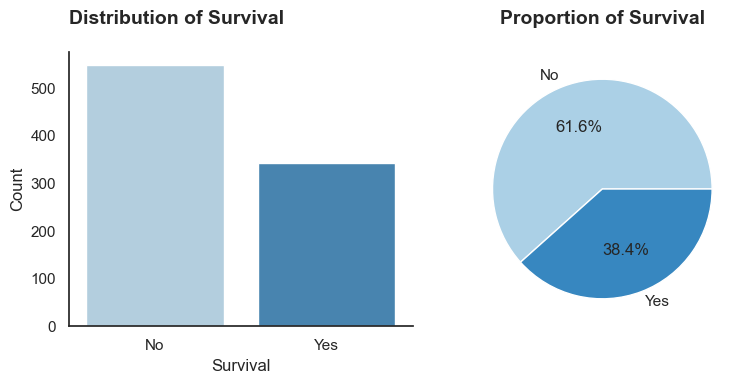

In [272]:
# Using the Seaborn "Blues" palette directly
palette_blues2 = sns.color_palette("Blues", n_colors=2)  # Adjusting based on the required number of colors
palette_blues3 = sns.color_palette("Blues", n_colors=3)  # Adjusting based on the required number of colors
palette_blues5 = sns.color_palette("Blues", n_colors=5)  # Adjusting based on the required number of colors

# Setting the Seaborn style
sns.set(style="white")

# Prepare the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Countplot for the 'target' column
sns.countplot(data=df_train, x='Survived', ax=axes[0], palette=palette_blues2)
axes[0].set_title('Distribution of Survival', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Survival')
sns.despine(ax=axes[0])
# Count the number of different categories in the 'target' column for the pie chart
target_counts = df_train['Survived'].value_counts()

# Pie plot for the 'target' column
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=palette_blues2)
axes[1].set_title('Proportion of Survival', fontsize=14, pad=20, loc="center", fontweight="bold")

plt.tight_layout()  # Adjusts the layout to avoid overlap
plt.show()


The two charts here represent the survival of passengers from the Titanic dataset.

- The first chart, "Distribution of Survival," is a bar chart that shows the count of individuals who did not survive ("No") versus those who did survive ("Yes"). There is a higher count of individuals who did not survive compared to those who did.

- The second chart, "Proportion of Survival," is a pie chart that gives the percentage of passengers who survived and those who did not. It indicates that 61.6% of the passengers did not survive, while 38.4% did.

Combined, these charts not only show the stark reality of the Titanic disaster, where a significant majority of passengers did not survive the sinking, but also illustrate an imbalance in our target variable 'Survived'. This imbalance is critical to acknowledge as it can influence the performance and evaluation of predictive models. Addressing this through techniques like resampling or using appropriate evaluation metrics that consider imbalance is crucial for developing robust and fair predictive models.

#### **Gender**

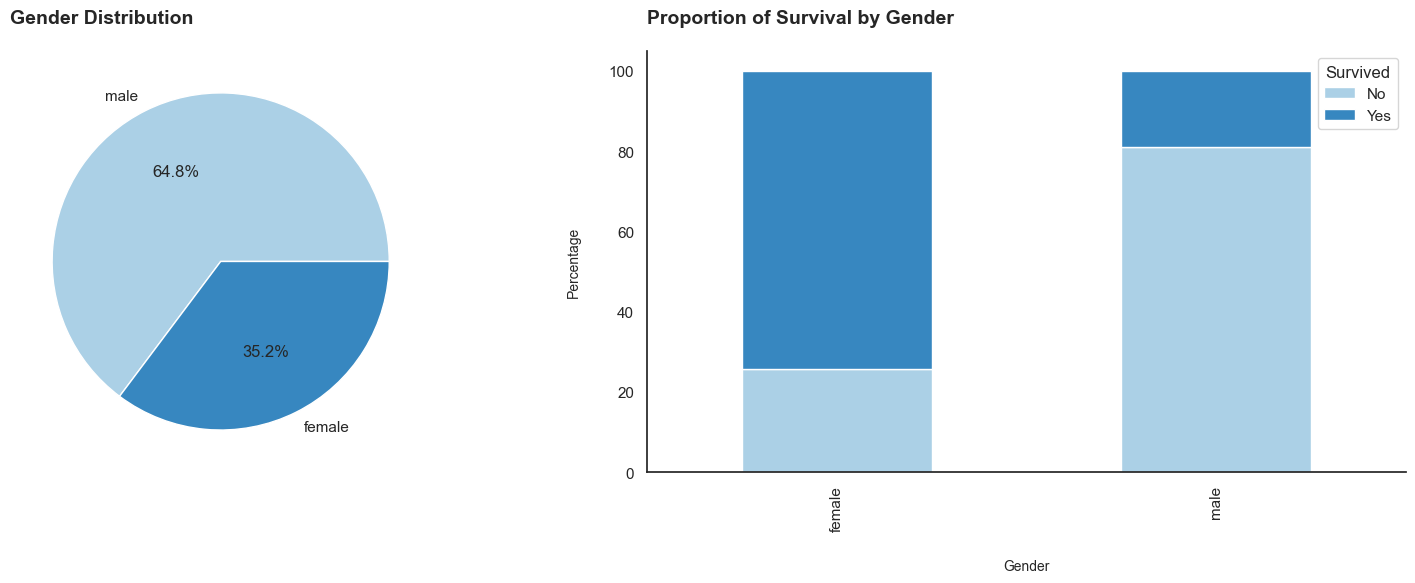

In [273]:
# Seaborn style and palette setting
sns.set(style="white")

# Prepare figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Pie-Chart for 'Gender' on the left side with the custom Blues palette
df_train['Sex'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', labels=['male', 'female'], colors=palette_blues2)
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create a cross-tab between 'Gender' and 'target' for the stacked bar chart
crosstab = pd.crosstab(index=df_train['Sex'], columns=df_train['Survived'], normalize='index') * 100

# Draw the stacked bar chart horizontally on the right side with the custom Blues palette
crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=palette_blues2)  # Colors for the bars

# Set labels and title
axes[1].set_title('Proportion of Survival by Gender', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
axes[1].set_xlabel('Gender', fontsize=10, labelpad=20)

# Hide top and right spines
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

- The pie chart titled "Gender Distribution" shows that out of the total number of passengers of the Titanic, 64.8% were male and 35.2% were female. This indicates a larger number of male passengers compared to females on the Titanic.

- The bar chart "Proportion of Survival by Gender" breaks down the survival rate by gender. It is clear that a greater percentage of females survived the sinking compared to males. The light-colored section of the bar for females (labeled "Yes") occupies a much larger portion than the corresponding section in the male bar, showing that the survival rate for females was significantly higher. Conversely, the dark-colored section (labeled "No") is much larger in the male bar, indicating that a higher proportion of males did not survive.

This information is consistent with historical accounts that women and children were given priority during the lifeboat evacuations, resulting in a higher survival rate for females. 

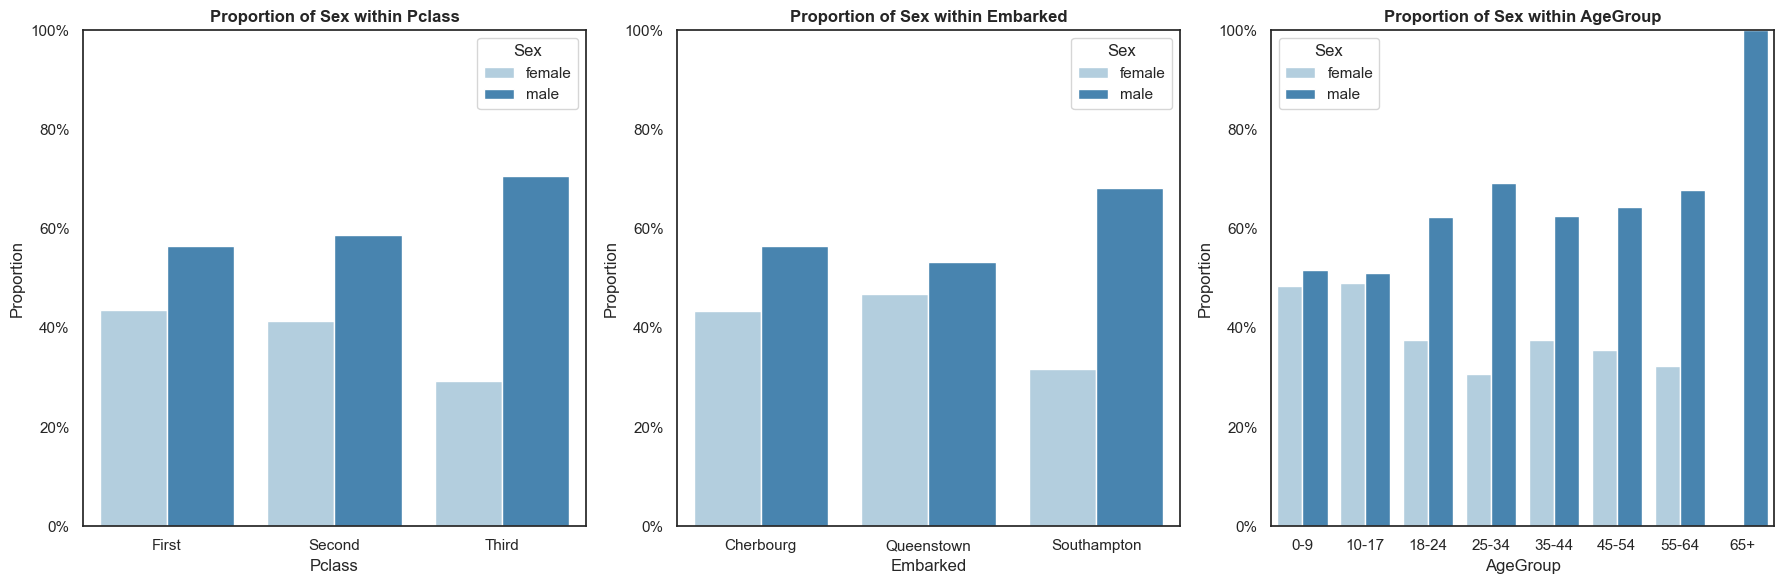

In [274]:
# List of the object columns to plot
object_columns = ['Pclass', 'Embarked', 'AgeGroup']

# Plot proportions by category
plot_proportion_by_category(df_train, object_columns=object_columns, target_column='Sex')



The three bar charts provide additional insight into the demographics of the passengers aboard the Titanic, broken down by passenger class, place of embarkation, and age group, respectively, with a focus on gender distribution within each category.

- The first chart, "Proportion of Sex within Pclass," shows the gender distribution across different passenger classes (First, Second, and Third). A higher proportion of males is evident in each class, but it is most pronounced in the Third Class, where the male proportion significantly outweighs that of females.

- In the second chart, "Proportion of Sex within Embarked," we observe the gender distribution based on the port of embarkation: Cherbourg, Queenstown, and Southampton. The proportion of males is higher for each embarkation point, with Cherbourg having the most balanced distribution and Southampton having the highest discrepancy in favor of males.

- The third chart, "Proportion of Sex within AgeGroup," illustrates the gender distribution across different age groups. Again, the proportion of males is consistently higher across all age groups, with the 0-9 and 18-24 age groups showing a more balanced distribution. Notably, the 65+ age group has a significantly higher proportion of males.

These charts underscore the fact that males were the majority in every demographic segment aboard the Titanic. Such information can be crucial for understanding the social dynamics of the passengers, which could, in turn, affect survival patterns as seen in other analyses of Titanic data. For example, since Third Class had a high proportion of males, and historical accounts suggest that Third Class passengers had lower survival rates, the gender imbalance in that class might have had implications for survival outcomes.

#### **Passenger Class**

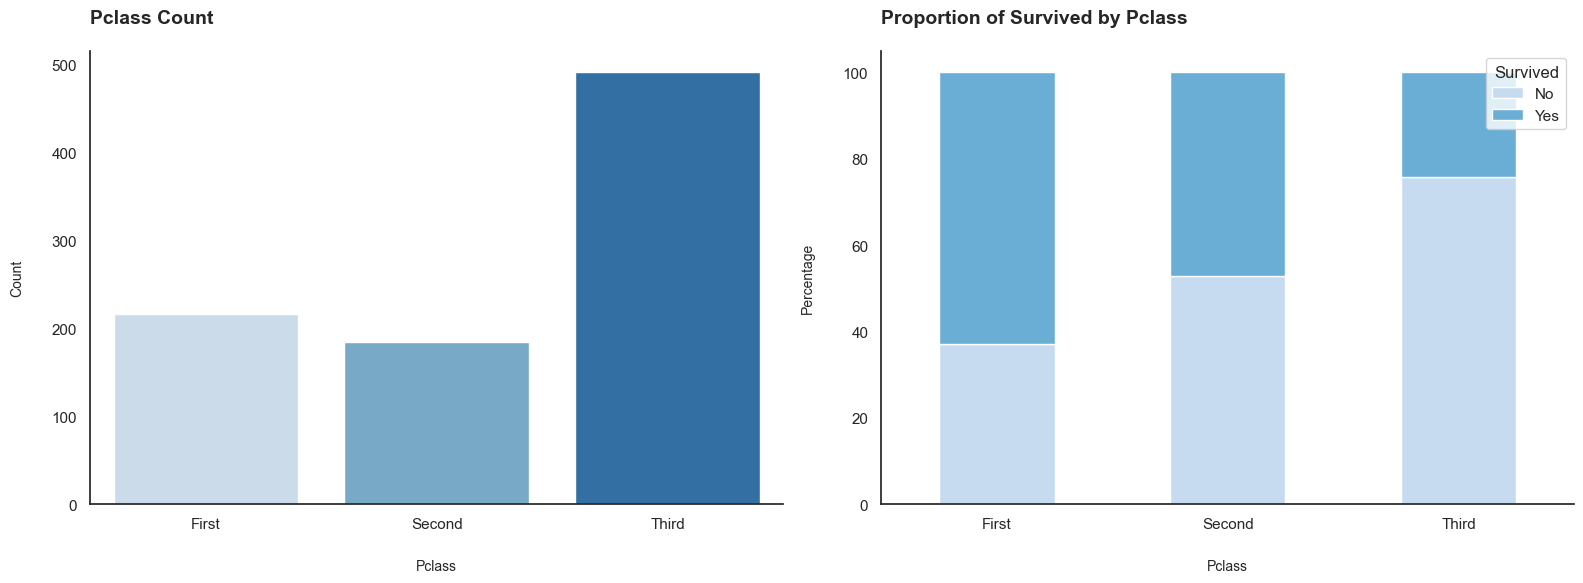

In [275]:
# Plot counts and proportions
plot_counts_and_proportions(df_train, 'Pclass', 'Survived')


The two bar charts here represent the count and survival rates of passengers on the Titanic, segmented by the class of ticket they held: First, Second, and Third Class.

- The first chart, "Pclass Count," shows the number of passengers in each class. The Third Class had the highest number of passengers, significantly more than First and Second Class. Second Class had the least number of passengers among the three.

- In the second chart, "Proportion of Survived by Pclass," we see the survival rates within each class. First Class passengers had the highest survival rate, with more than half surviving, as indicated by the lighter-colored section of the bar. Second Class passengers had a lower survival rate than First Class but higher than Third Class. Third Class passengers had the lowest survival rate, with less than half surviving, as the dark-colored section labeled "No" is larger than the light-colored "Yes" section.

These charts collectively tell us that although Third Class had the most passengers, their survival rate was the lowest. Conversely, First Class, despite having fewer passengers than Third Class, had the highest survival rate. This disparity in survival rates across classes could be attributed to various factors such as the location of cabins in relation to lifeboats, the prioritization of rescue efforts, or the differing levels of urgency and means to respond to the emergency among the classes. 

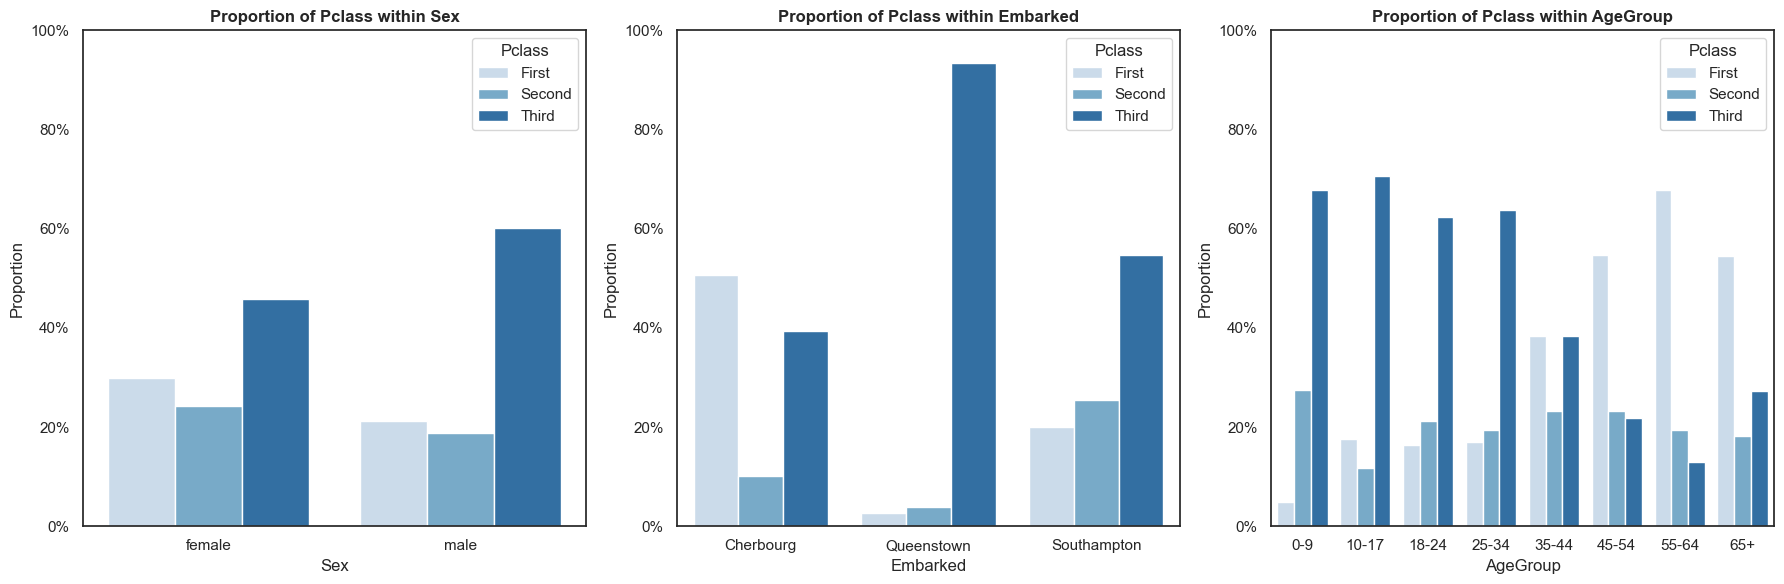

In [276]:
# List of the object columns to plot
object_columns = ['Sex', 'Embarked', 'AgeGroup']

# Plot proportions by category
plot_proportion_by_category(df_train, object_columns=object_columns, target_column='Pclass')

The set of three bar charts provides a breakdown of the Titanic passenger composition according to passenger class (First, Second, and Third), segmented by gender, place of embarkation, and age group.

- In the first chart, "Proportion of Pclass within Sex," we see the class distribution among females and males. A higher percentage of females were in First and Second Class compared to males, while a higher percentage of males were in Third Class.

- The second chart, "Proportion of Pclass within Embarked," shows where passengers embarked the ship and their distribution across classes. Most passengers who boarded at Cherbourg were in First Class, Queenstown had a majority in Third Class, and Southampton had a more distributed proportion across all classes but still with a prevalence of Third Class passengers.

- The third chart, "Proportion of Pclass within AgeGroup," illustrates the distribution of classes among various age groups. Younger age groups (0-9 and 10-17) had a greater proportion of Third Class passengers. As the age groups increase, there is a varied distribution among the classes, but it's notable that the oldest age group (65+) had a higher proportion in First Class.

These charts highlight the socio-economic diversity aboard the Titanic and indicate that females tended to be in higher classes than males. Passengers boarding from Cherbourg were more likely to be in higher classes, while those from Queenstown were predominantly in Third Class. Additionally, there is a trend where younger passengers were more likely to be in lower classes, and the oldest passengers were more likely to be in higher classes.

#### **Embarked**

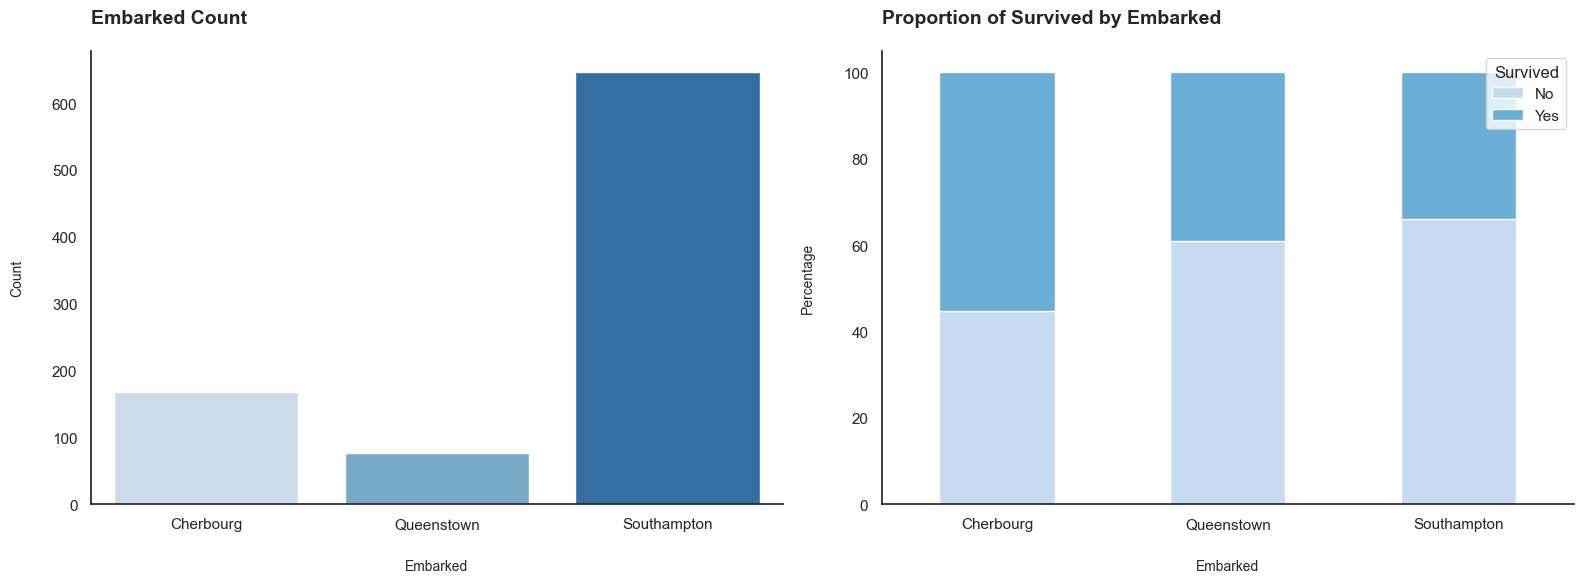

In [277]:
# Plot counts and proportions
plot_counts_and_proportions(df_train, 'Embarked', 'Survived')

The two bar charts here represent the count and survival rates of passengers on the Titanic based on their port of embarkation: Cherbourg, Queenstown, and Southampton.

- The first chart, "Embarked Count," shows the number of passengers who embarked from each port. The majority of passengers embarked from Southampton, a significantly larger number than those who boarded at Cherbourg and Queenstown.

- In the second chart, "Proportion of Survived by Embarked," we see the survival rates for passengers from each embarkation point. Passengers who embarked from Cherbourg had the highest survival rate, with over half surviving, as indicated by the lighter-colored section of the bar. The survival rate for passengers from Queenstown is slightly lower, and Southampton has the lowest survival rate, with less than half of its passengers surviving, as the dark-colored section labeled "No" is larger than the light-colored "Yes" section.

These charts provide insight into the relationship between embarkation points and survival rates. The high survival rate of passengers from Cherbourg might be connected to the higher proportion of First Class passengers among them, as seen in previous charts. Given that First Class passengers had a better survival rate overall, this would contribute to the higher survival percentage for Cherbourg. Conversely, the large number of passengers from Southampton, many of whom were in Third Class, might explain the lower survival rate for that group, since Third Class passengers had more difficulty accessing lifeboats and faced more obstacles during the evacuation.

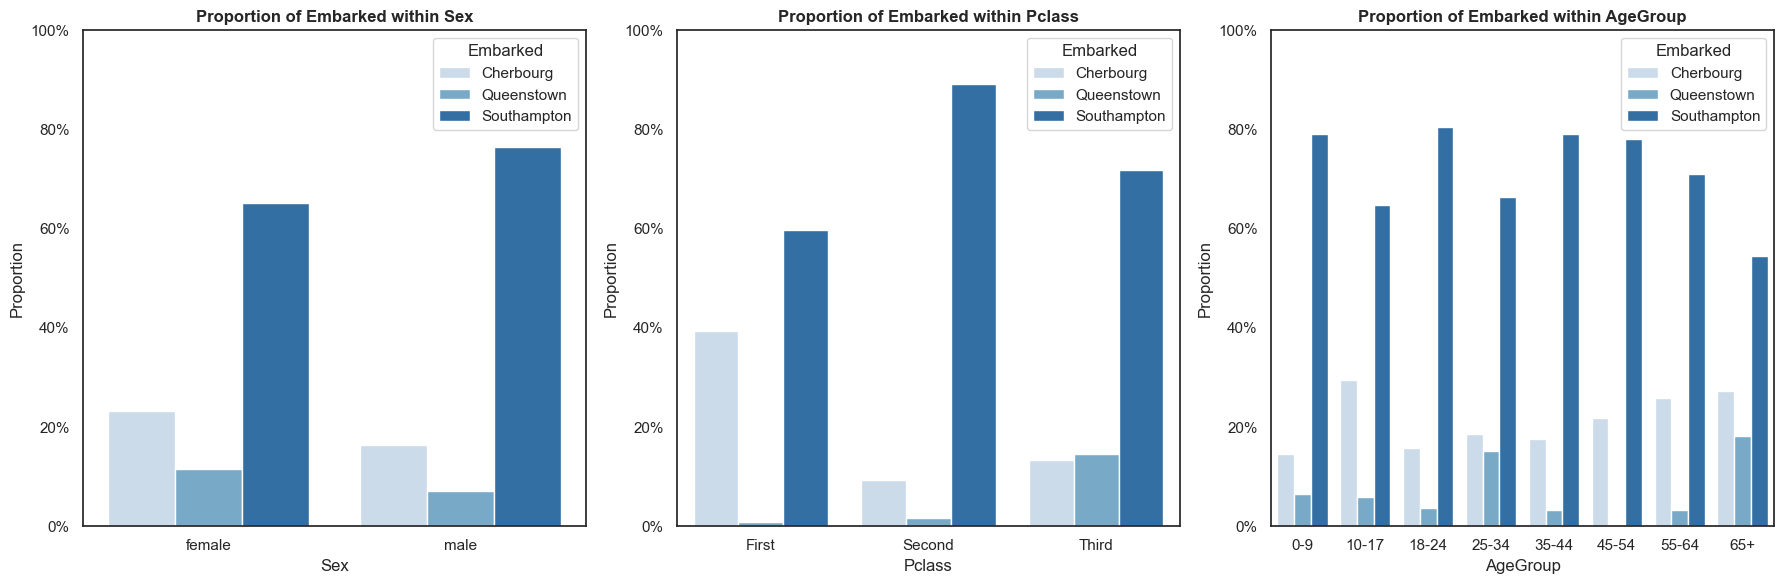

In [278]:
# List of the object columns to plot
object_columns = ['Sex', 'Pclass', 'AgeGroup']

# Plot proportions by category
plot_proportion_by_category(df_train, object_columns=object_columns, target_column='Embarked')

The set of three bar charts provides a breakdown of the Titanic passengers' ports of embarkation, segmented by gender, passenger class, and age group.

- In the first chart, "Proportion of Embarked within Sex," we observe that a larger proportion of females embarked from Southampton, whereas the proportion of males was more evenly distributed across all three ports, with a slightly higher proportion from Southampton as well.

- The second chart, "Proportion of Embarked within Pclass," reveals that the majority of First Class passengers embarked from Southampton, a significant number of Second Class passengers embarked from Southampton as well, and the majority of Third Class passengers embarked from Queenstown. Cherbourg had a smaller proportion across all classes compared to Southampton but had a notably higher proportion of First Class passengers than Queenstown.

- The third chart, "Proportion of Embarked within AgeGroup," shows that across most age groups, Southampton was the primary port of embarkation. The passengers from Cherbourg and Queenstown varied more by age, with Cherbourg showing a higher proportion in the 18-24 and 25-34 age groups, and Queenstown having a particularly high proportion in the 0-9 age group. The 65+ age group had the fewest passengers and the majority embarked from Southampton.

These charts depict how the port of embarkation is related to various passenger demographics aboard the Titanic. Southampton was the predominant port for all classes and most age groups, likely due to it being the Titanic's point of departure. The variation in embarkation among age groups and classes suggests differing patterns of travel and migration during that time. For example, Queenstown's high proportion of Third Class passengers might reflect emigration from Ireland, while Cherbourg's higher proportion of younger adults in First Class might indicate leisure or business travel from continental Europe.

#### **Age**

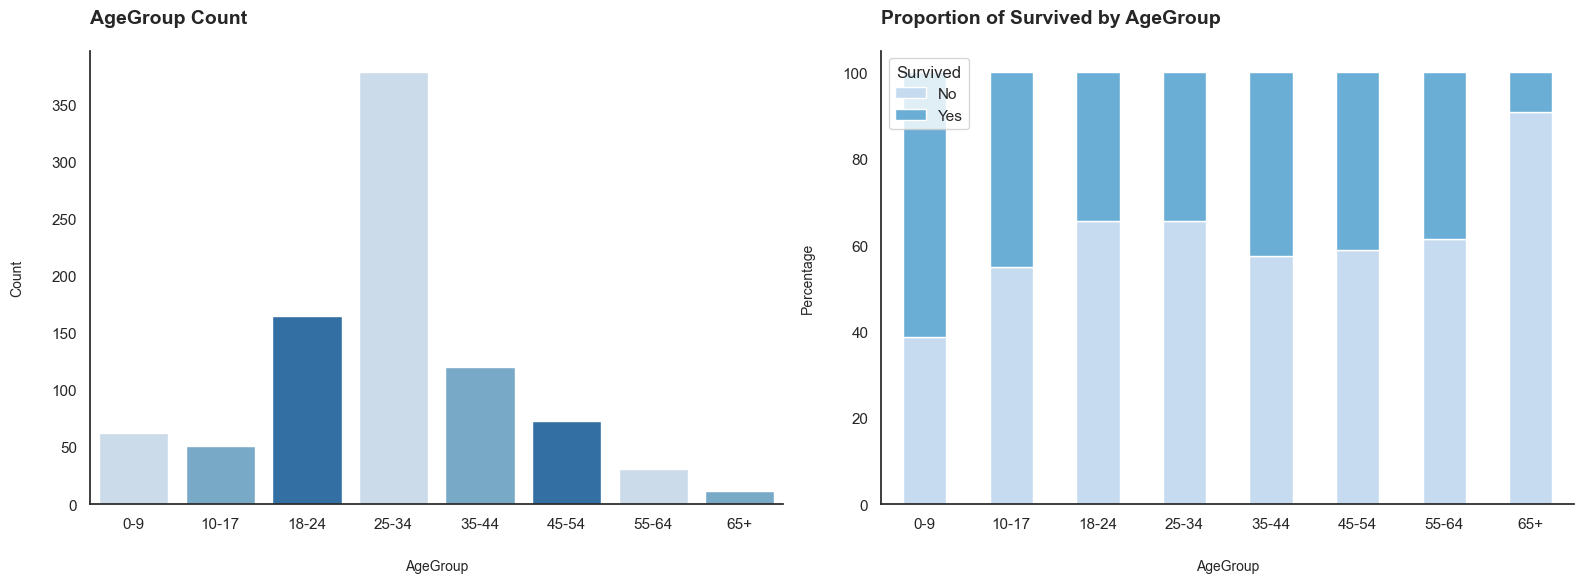

In [279]:
# Plot counts and proportions
plot_counts_and_proportions(df_train, 'AgeGroup', 'Survived')

The two bar charts present information about the passengers on the Titanic, categorized by age groups, with one chart showing the count of passengers in each group and the other illustrating the survival proportions within those age groups.

- In the "AgeGroup Count" chart, we see that the age group with the highest count is the 25-34 range, followed by the 18-24 and 35-44 ranges. The lowest counts are in the youngest (0-9) and the oldest (65+) age groups.

- The "Proportion of Survived by AgeGroup" chart indicates the survival rates within each age group. Children (0-9) had the highest survival rate, which is consistent with the historical accounts that prioritize "women and children first" for lifeboat evacuation. The other age groups show lower survival rates, with the rate generally decreasing with age, although the 10-17 and 18-24 groups have nearly identical survival rates, and there is a small increase in survival rate in the 25-34 group compared to the adjacent older group. The 65+ age group has the lowest survival rate, which could be attributed to several factors including less physical ability to withstand the harsh conditions of the disaster.

Together, these charts underscore the tragic reality that although children were given priority during the disaster, not all age groups had the same chance of survival. The data reflects the harsh conditions and difficult decisions made during the evacuation of the Titanic.

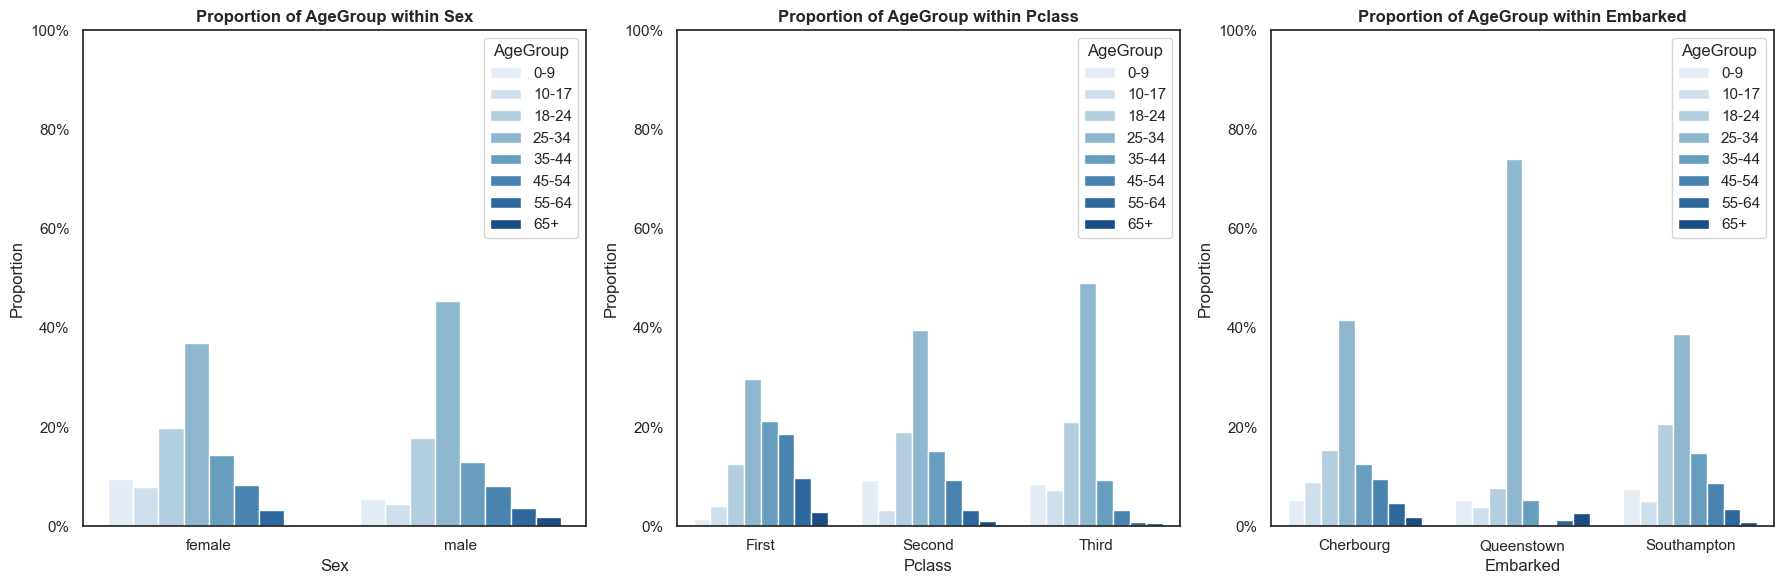

In [280]:
# List of the object columns to plot
object_columns = ['Sex', 'Pclass', 'Embarked']

# Plot proportions by category
plot_proportion_by_category(df_train, object_columns=object_columns, target_column='AgeGroup')

- In the "Proportion of AgeGroup within Sex" chart, we see the age distribution among female and male passengers. Notably, there's a larger proportion of younger females (especially in the 18-24 age group), whereas the distribution among males is more spread out across the age groups, with peaks in the 18-24 and 25-34 age groups.

- The "Proportion of AgeGroup within Pclass" chart shows the age distribution across First, Second, and Third Class passengers. First Class has a more uniform distribution with slightly higher proportions in the middle age ranges (35-54). Second Class has notable proportions in the 25-34 and 35-44 age groups. Third Class, on the other hand, has a significantly higher proportion of younger adults, particularly in the 18-24 and 25-34 age groups, and a noticeable amount of children in the 0-9 age group.

- Lastly, the "Proportion of AgeGroup within Embarked" chart details the age distribution for passengers who embarked at Cherbourg, Queenstown, and Southampton. Cherbourg's passengers have higher proportions in the 25-34 and 35-44 age groups. Queenstown shows a significant number of young adults in the 18-24 range. Southampton has a broad distribution across age groups but is particularly notable for the 0-9 and 25-34 age groups.

### **Numerical Columns**


Exploratory Data Analysis (EDA) of numerical variables is a fundamental step in understanding the quantitative aspects of a dataset. This analysis involves examining the central tendencies, variability, and distributions of numeric data, which are key to uncovering patterns, anomalies, and correlations that might not be evident from raw data alone.

For numerical variables, EDA typically involves using descriptive statistics such as mean, median, mode, range, variance, and standard deviation to summarize the data. Graphical techniques like histograms, box plots, scatter plots, and violin plots are also crucial as they visually represent the data's distribution, highlight outliers, and show potential clusters or relationships between variables.

In our EDA process, we focus on identifying how these numerical variables interact with each other and with categorical variables. This can help pinpoint trends, assess the scale of effect variables might have on each other, and inform decisions on necessary data transformations or the creation of new features. Understanding the behavior of numerical data through EDA is vital for ensuring that subsequent modeling is based on accurate and meaningful interpretations, leading to more effective and insightful outcomes.

#### **Fare**

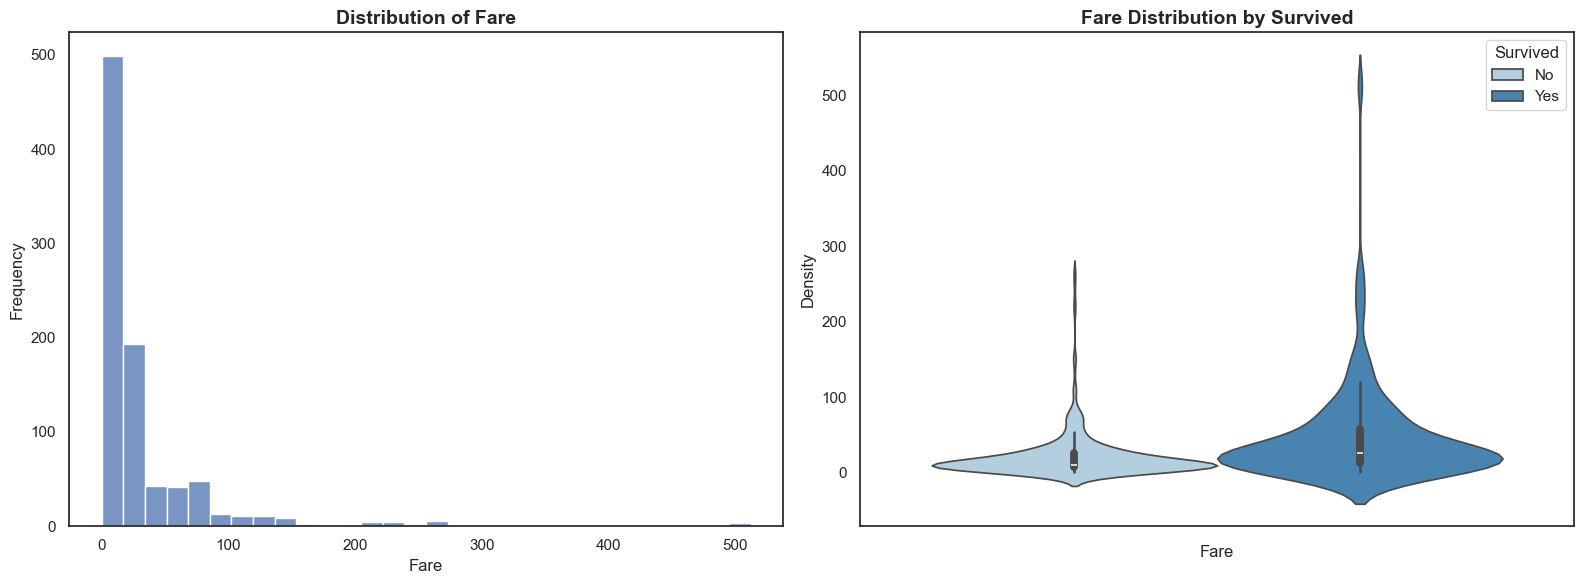

In [281]:
# Plot histogram and violin
plot_histogram_and_violin(df_train, 'Fare', 'Survived')

The two charts present the distribution of fares among passengers on the Titanic.

- The first chart, "Distribution of Fare," is a histogram that shows the frequency of various fare amounts. The majority of fares are low, with a high frequency at the cheapest price range. The histogram bars quickly decrease in height as fare price increases, indicating that higher fares are much less common. There are very few passengers at the highest fare levels, which suggests a small number of passengers may have paid for very expensive tickets.

- The second chart, "Fare Distribution by Survived," is a violin plot that compares the distribution of fares between passengers who survived and those who did not. Both distributions are skewed towards the lower fares, but there's a noticeable difference between the two groups. The plot for passengers who did not survive ("No") shows a more concentrated distribution around lower fares, while the plot for those who survived ("Yes") is wider and has a fatter upper section, suggesting that a higher proportion of passengers who paid more for their tickets survived.

This could indicate that passengers who paid higher fares, potentially those in higher classes, had better access to lifeboats or were given priority in evacuation, which is consistent with historical accounts of the Titanic disaster.

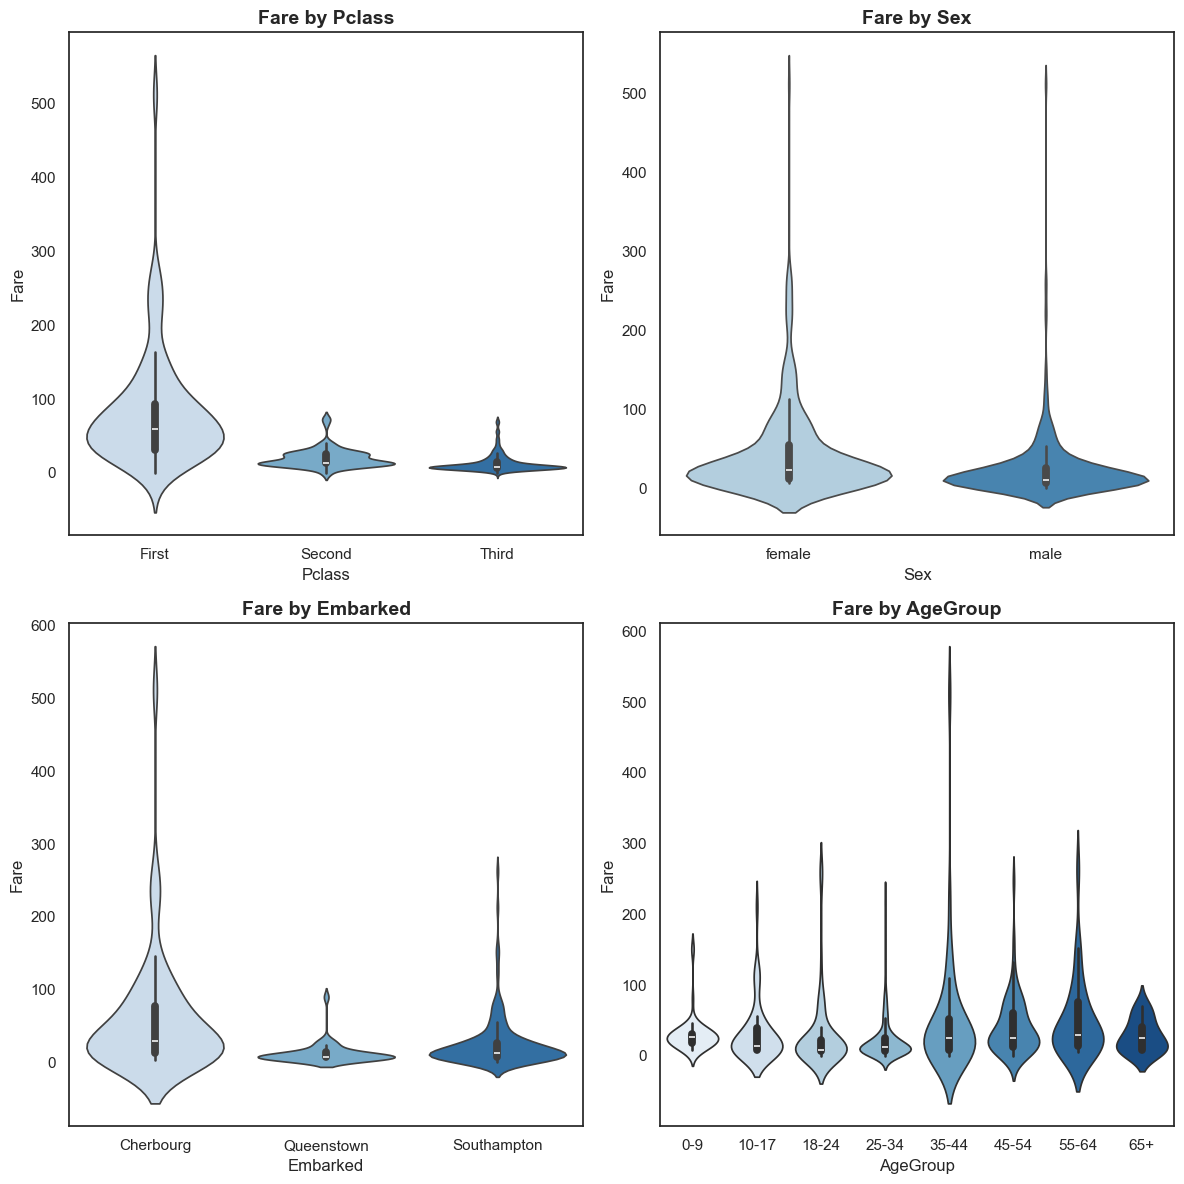

In [282]:
# Categorical columns to use
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'AgeGroup']

# Plot violins
create_violin_plots(df_train, 'Fare', categorical_columns)

The four violin plots provide a visual distribution of Titanic passenger fares based on different categories: class (Pclass), gender (Sex), port of embarkation (Embarked), and age groups (AgeGroup).

- "Fare by Pclass" shows the distribution of fares within each passenger class. As expected, First Class has a much higher fare distribution, with a wide range and several high fare outliers, reflecting the luxury and expense of First Class accommodations. Second Class has a narrower distribution and fewer outliers, indicating more moderate fares, while Third Class shows the lowest fares with the narrowest distribution, indicating that most Third Class passengers paid relatively low fares.

- "Fare by Sex" reveals the fare distribution across genders. Both distributions have a wide range and outliers, but the plot for females shows slightly higher fares overall, which may suggest that female passengers had purchased higher class tickets more often than male passengers, or it might reflect family ticket purchases.

- "Fare by Embarked" illustrates fare differences based on the port where passengers embarked. Those who embarked at Cherbourg tend to have higher fares, with a wide range and several outliers, indicating that many passengers from Cherbourg purchased more expensive tickets. Queenstown's distribution is much lower, suggesting passengers from there generally paid lower fares. Southampton shows a mix, with a range of fares but a concentration at the lower end.

- In the "Fare by AgeGroup" violin plot, we can observe that the distribution of fares across different age groups is varied. Each age group displays a wide range of fares with a concentration towards the lower end, which is indicated by the thicker part of each violin. However, there are significant tails extending upwards, showing that there were passengers in each age group who paid much higher fares. The 0-9 age group seems to have the lowest range of fares, which would make sense as these tickets could be for children, who typically pay reduced fares.

- For other age groups, there are outliers present, which are depicted by points outside of the upper extremes of the violins. These outliers represent passengers who paid significantly higher fares than the majority of others in their age group. The age groups 35-44 and 45-54 have especially pronounced upper tails and outliers, indicating a number of passengers in these age groups purchased higher-priced tickets.

Overall, while most passengers across all age groups tended to pay lower fares, indicative of Third Class tickets, there were passengers in every age group who purchased higher fare tickets, which could correlate with First or Second Class accommodations. This variation reflects the socio-economic diversity of the Titanic's passengers.

#### **Parch**

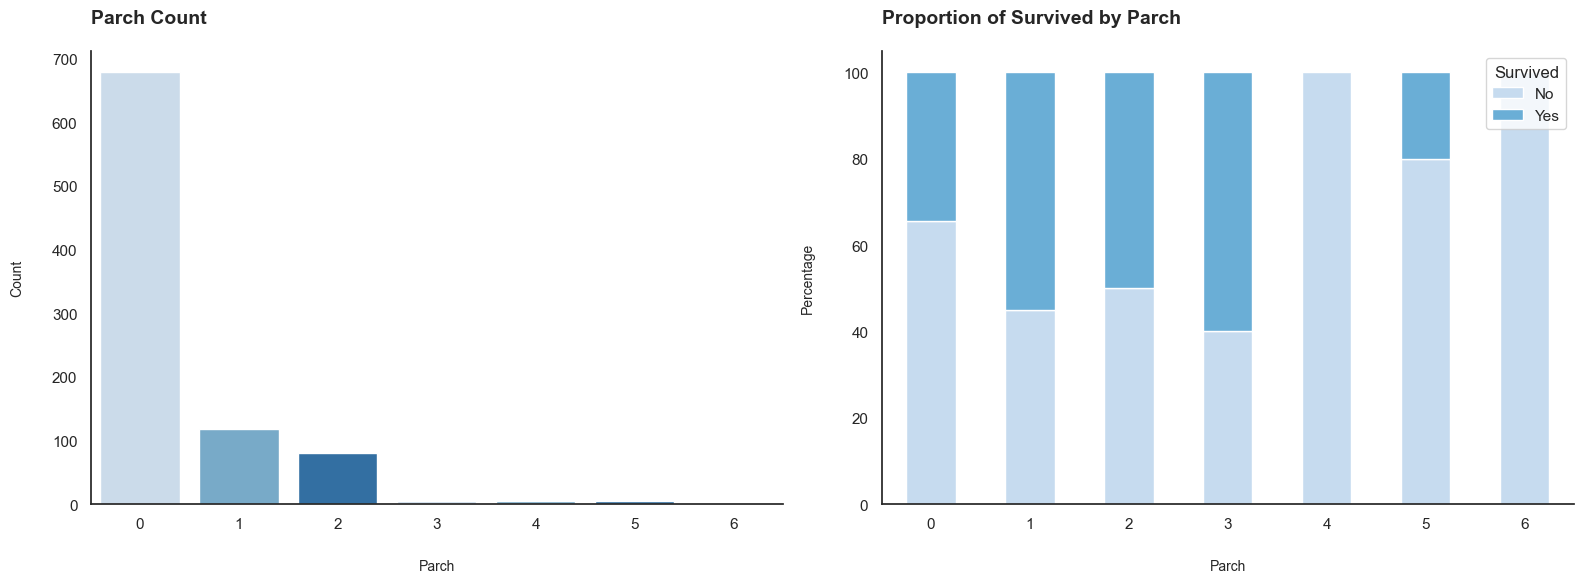

In [283]:
# Plot counts and proportions
plot_counts_and_proportions(df_train, 'Parch', 'Survived')

In the next step we focus on the variable "Parch," which stands for the number of parents or children aboard.

- The first chart, "Parch Count," displays the number of passengers with different counts of parents or children on board. The majority of passengers did not have any parents or children with them, as shown by the tall bar at position 0. The number of passengers decreases as the number of accompanying parents or children increases, with very few passengers having three or more.

- The second chart, "Proportion of Survived by Parch," shows the survival rate of passengers based on the number of parents or children they had on board. Passengers with no parents or children (Parch=0) had a lower survival rate than those with one, two, or three. However, as the number increases to four or more, the survival rate drops again, although the sample size for these groups appears to be much smaller.

From these charts, we can infer that passengers traveling with one to three family members had a higher likelihood of survival compared to those traveling alone or with more than three family members. This might suggest that small family units were better able to stay together and help each other in the evacuation process. However, it's important to note that the sample size for passengers with four or more family members is smaller, so conclusions drawn from those numbers should be made with caution.

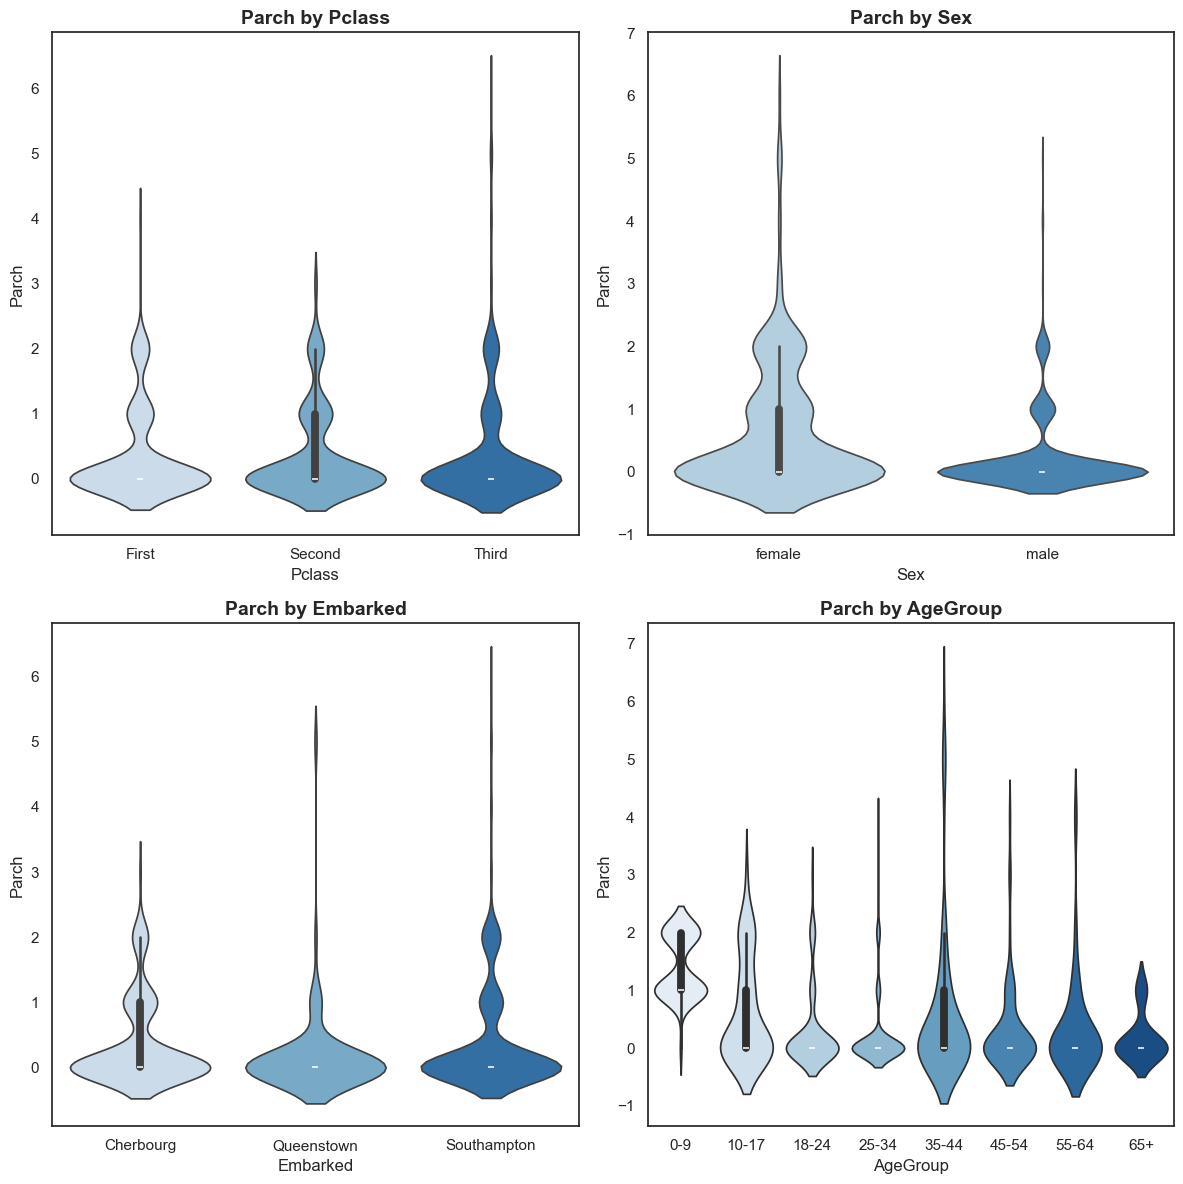

In [284]:
# Cat columns to use
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'AgeGroup']

# Plot violins
create_violin_plots(df_train, 'Parch', categorical_columns)

The four violin plots provide a comparison of the number of parents or children (Parch) that passengers on the Titanic had, broken down by class (Pclass), gender (Sex), port of embarkation (Embarked), and age group (AgeGroup).

- In the "Parch by Pclass" plot, we see that the distribution of family sizes is slightly different across classes. First and Second Class passengers have a wider distribution, indicating they were more likely to travel with one or more parents or children, whereas Third Class passengers predominantly traveled alone or with fewer parents or children.

- The "Parch by Sex" plot indicates that females were more likely than males to travel with parents or children, as evidenced by the wider distribution around Parch values greater than zero.

- Looking at "Parch by Embarked," passengers from Cherbourg have a wider distribution than those from Queenstown and Southampton, suggesting they traveled with more family members on average.

- Finally, "Parch by AgeGroup" shows that younger passengers (especially those under 18) and passengers in the 35-44 age group were more likely to be traveling with parents or children, as reflected by the wider distribution in these age categories. The plots for older age groups generally show fewer parents or children accompanying them, with the exception of some outliers.

#### **Siblings and Spouses**

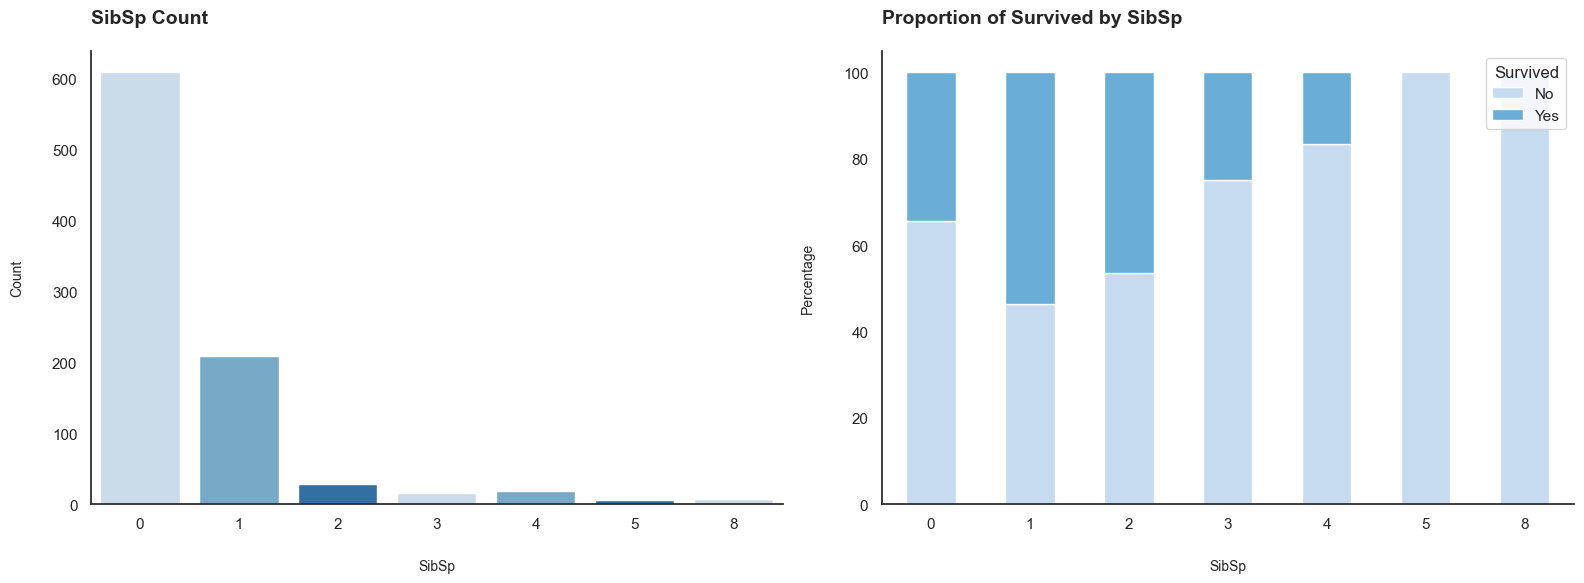

In [285]:
# Plot counts and proportions
plot_counts_and_proportions(df_train, 'SibSp', 'Survived')

The two bar charts visualize data regarding the Titanic passengers, with a focus on the "SibSp" variable, which represents the number of siblings or spouses accompanying a passenger.

- The first chart, "SibSp Count," displays the count of passengers by the number of siblings or spouses they had on board. The majority of passengers (reflected in the tall bar at the left) did not have any siblings or spouses with them. The number decreases as the count of SibSp increases, with very few passengers having more than two siblings or spouses on the voyage.

- The second chart, "Proportion of Survived by SibSp," shows the survival rates for different SibSp values. Passengers with no siblings or spouses had a lower survival rate compared to those with one or two. However, as the SibSp value increases, the survival rate decreases, which can be seen in the bars for three or more siblings or spouses. Notably, there appears to be an absence of bars for some SibSp values (such as 6 and 7), which could indicate that there were no passengers with those numbers of siblings or spouses, or they were omitted from the dataset.

Together, these charts indicate that passengers traveling with a small number of siblings or spouses had better survival rates. Those traveling alone or with large families were less likely to survive. This could reflect the assistance and cooperation that smaller family units were able to provide each other during the evacuation.

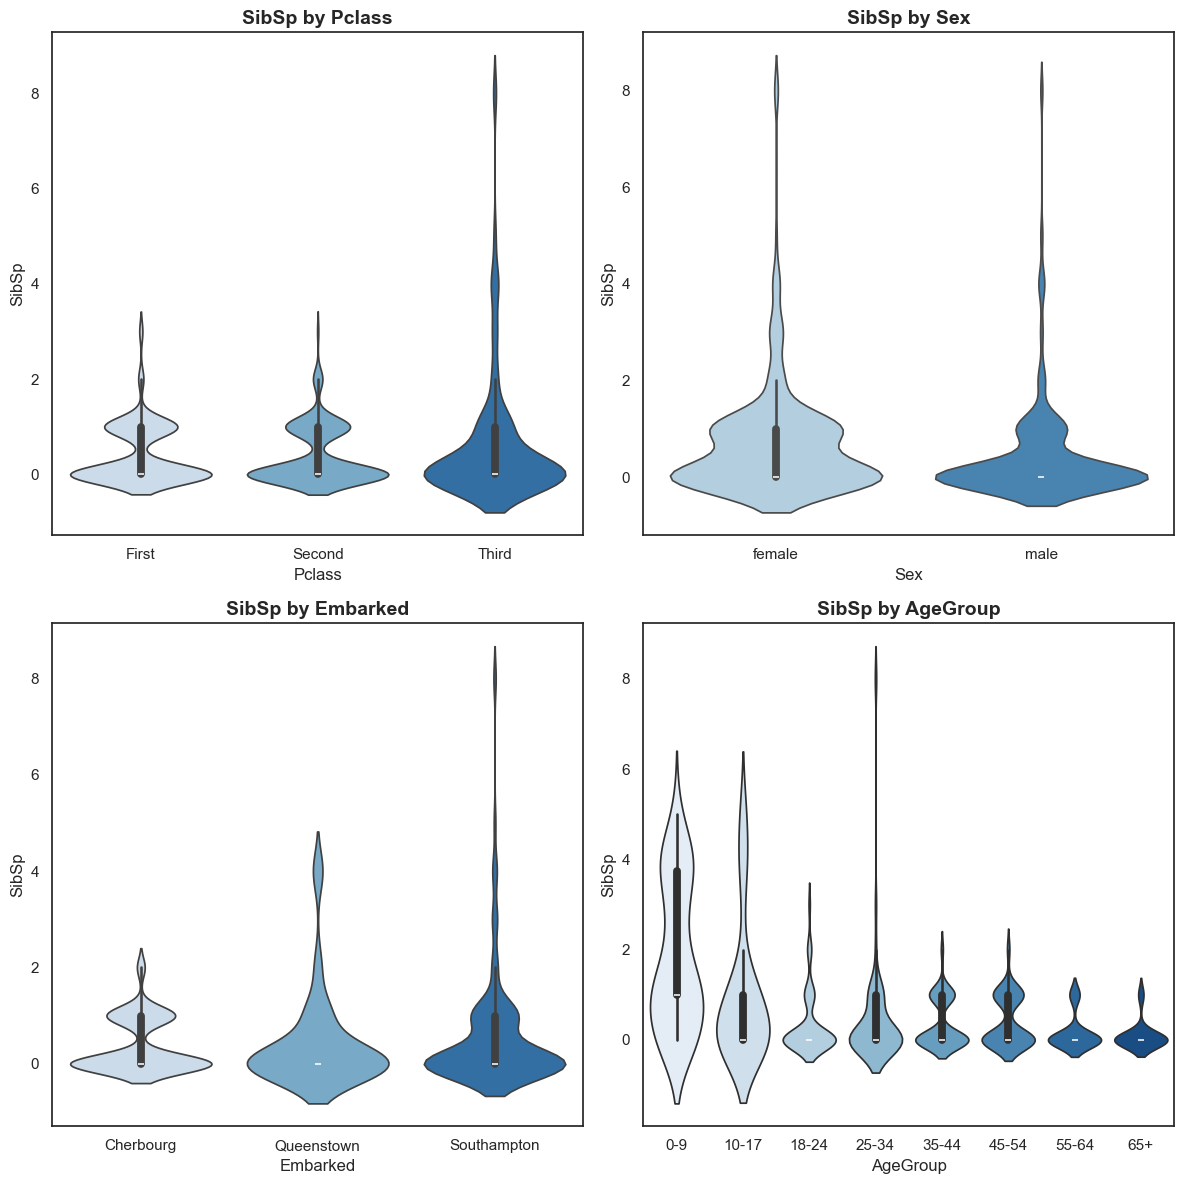

In [286]:
# Cat columns to use
categorical_columns = [ 'Pclass', 'Sex', 'Embarked', 'AgeGroup']

# Plot violins
create_violin_plots(df_train, 'SibSp', categorical_columns)

These four violin plots illustrate the distribution of the number of siblings and spouses (SibSp) among passengers on the Titanic across different categories: class (Pclass), gender (Sex), port of embarkation (Embarked), and age group (AgeGroup).

- The "SibSp by Pclass" plot shows that passengers in Third Class generally had more siblings or spouses aboard than those in First and Second Class. The distribution in Third Class is wider and has a longer upper tail, indicating more passengers with a higher number of SibSp.

- The "SibSp by Sex" plot suggests that females on the Titanic had more siblings or spouses with them than males, indicated by the wider distribution for females.

- Looking at "SibSp by Embarked," the distribution among passengers who embarked at Southampton and Queenstown is broader compared to Cherbourg, suggesting that passengers from Southampton and Queenstown were more likely to travel with more siblings or spouses.

- Finally, "SibSp by AgeGroup" shows varying distributions of SibSp across different age groups. Younger passengers (0-9 and 10-17) had a wider range, indicating that they were more likely to be traveling with siblings. This is in contrast to older age groups (55-64 and 65+), which show a narrower distribution, reflecting that older passengers were less likely to travel with siblings or spouses.

These violin plots provide insight into family travel patterns on the Titanic and may reflect social norms and practices of the time, such as larger families traveling together in Third Class or younger passengers traveling with their siblings.

#### **Correlation**

In the following correlation heatmap, the relationships between the variables SibSp (number of siblings/spouses aboard), Parch (number of parents/children aboard), and Fare (ticket fare) are depicted. Here's an interpretation of the results:

- **SibSp and Parch:** A correlation of 0.41 indicates a moderate positive association between the number of siblings/spouses and the number of parents/children aboard. This suggests that passengers traveling with siblings or spouses are also likely to be traveling with children or parents.

- **SibSp and Fare:** The correlation of 0.16 is quite low, suggesting there is only a slight positive relationship between the number of siblings/spouses and the ticket fare. It could indicate that having more siblings or spouses aboard has a small effect on the fare cost, perhaps due to ticket pricing structures for family bookings.

- **Parch and Fare:** The correlation of 0.22 is also low, but slightly higher than the SibSp and Fare correlation. This indicates a weak positive relationship between the number of parents/children and the ticket fare. Similar to SibSp, this could suggest that passengers with more family members (in this case, children or parents) might tend to pay a little more, possibly due to cabin assignments or ticket types.

- **Multicollinearity**: The degree of multicollinearity shown in the heatmap is unlikely to impair the performance of tree-based models like Random Forest, Decision Tree, or XGBoost. If we intend to algorithms that are sensitive to multicollinearity, such as linear regression, we might consider combining SibSp and Parch into a single feature or using other techniques to address multicollinearity.

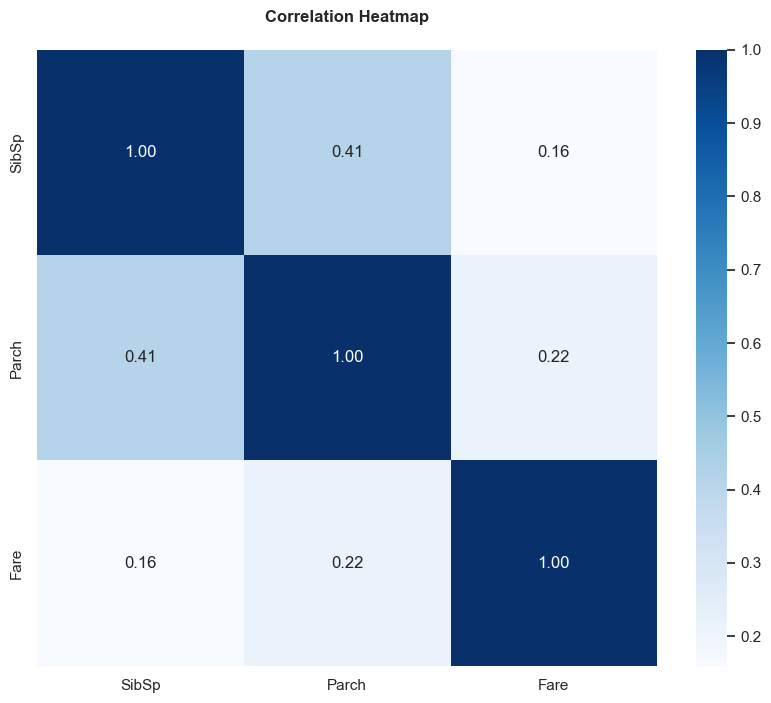

In [287]:
# Select numeric features for the pairplot (you need to adjust this list based on your actual numeric columns)
numeric_features = df_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()

# Calculate the correlation matrix for the numeric features
corr_matrix = df_train[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True )
plt.title('Correlation Heatmap', pad=20, fontweight="bold")
plt.show()



### **Summary**

The exploratory data analysis (EDA) conducted on the Titanic dataset has yielded several key insights regarding the tragedy:

- A significant majority of passengers did not survive the sinking, with survival data indicating a stark imbalance—61.6% did not survive, while only 38.4% did. This imbalance in the target variable 'Survived' is important for the performance and evaluation of predictive models.

- Gender played a crucial role in survival outcomes, with a markedly higher survival rate for females compared to males, aligning with the historical "women and children first" protocol.

- Socioeconomic status, as indicated by fare and passenger class, was a significant predictor of survival. Higher fares and first-class tickets were correlated with higher survival rates, suggesting those with higher socioeconomic status had better chances of survival, potentially due to priority in lifeboat access or cabin location.

- Family connections were influential; passengers with one to three family members (siblings/spouses or parents/children) had higher survival rates than those traveling alone or with larger families.

- Age was another factor, with children having a higher likelihood of survival and the survival rate generally decreasing with age.

- The place of embarkation revealed differences in survival rates, with passengers embarking from Cherbourg having the highest rate of survival, potentially due to a higher proportion of these passengers being in first class.

## **Modeling**


For modeling, I choose Random Forest, Decision Tree, and XGBoost for their diverse strengths in modeling complex relationships within the data.

- **Random Forest:** This ensemble method builds multiple decision trees and combines their predictions, offering robustness against overfitting and high accuracy. It's suitable for handling high-dimensional datasets and capturing nonlinear relationships.

- **Decision Tree:** Decision trees are simple to understand and interpret, making them valuable for exploring feature importance. While they're prone to overfitting, techniques like pruning and ensemble methods like Random Forest mitigate this issue.

- **XGBoost:** XGBoost is a powerful boosting algorithm known for its scalability and performance. It sequentially builds decision trees, learning from the errors of previous models, which often results in higher accuracy. Its regularization techniques help prevent overfitting, making it a popular choice for competitions and real-world applications.

### **Functions**

Just as I defined multiple functions for conducting exploratory data analysis (EDA), I have similarly established several functions to facilitate the modeling phase of our project. These predefined functions are designed to streamline the evaluation, visualization, and interpretation processes, ensuring a systematic approach to assessing and improving the models. By automating repetitive tasks and providing clear visual outputs, these functions enhance both efficiency and consistency throughout the modeling workflow. This structured methodology not only saves time but also ensures that each model is rigorously evaluated against established metrics, allowing for informed decisions and comparisons across different model iterations.

In [288]:
def print_results(y_true, y_proba, y_pred, model_name, store_metrics=True):
    """
    Function to print evaluation results including metrics, confusion matrix, and classification report.

    Parameters:
        y_true (array-like): True labels.
        y_proba (array-like): Predicted probabilities.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model.
        store_metrics (bool, optional): Whether to store metrics in a DataFrame. Default is True.
    """
    global model_metrics  # Assumes `model_metrics` is defined somewhere globally

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_proba)  # Utilizing probabilities for calculation

    # Create or update metrics in DataFrame
    metrics = {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
    if store_metrics:
        if model_name in model_metrics['Model'].values:
            model_metrics.loc[model_metrics['Model'] == model_name, list(metrics.keys())] = list(metrics.values())
        else:
            new_row = {'Model': model_name, **metrics}
            model_metrics = pd.concat([model_metrics, pd.DataFrame([new_row])], ignore_index=True)

    # Visualize Confusion Matrix and Classification Report side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix for {model_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Classification Report
    report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).iloc[:-1, :].T
    sns.heatmap(report, annot=True, cmap='Blues', cbar=False, fmt='.2f', ax=axes[1])
    axes[1].set_title(f'Classification Report for {model_name}')
    axes[1].set_xlabel('Metrics')
    axes[1].set_ylabel('Classes')
    
    plt.show()

In [289]:
def plot_feature_importance(model, preprocessor, numeric_features, categorical_features, model_name, palette='Blues_r'):
    """
    Function to plot feature importance for a given model.

    Parameters:
        model: Fitted model object.
        preprocessor: Preprocessor object.
        numeric_features (list): List of numeric feature names.
        categorical_features (list): List of categorical feature names.
        model_name (str): Name of the model.
        palette (str, optional): Color palette for the plot. Default is 'Blues_r'.
    """
    # Get column names after preprocessing
    numeric_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

    # Display feature importances
    feature_importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

    # Seaborn barplot with reversed order and specified color palette
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette=palette)
    plt.xlabel('Feature Importance', labelpad=20)
    plt.ylabel('Features', labelpad=20)
    plt.title(f'Feature Importance: {model_name}', fontsize=14, loc='left', fontweight='bold', pad=20)
    plt.show()

In [290]:


def plot_model_performance(model, X_train, y_train, X_val, y_val, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Function to plot model performance including learning curve and ROC curve.

    Parameters:
        model: Fitted model object.
        X_train: Training data features.
        y_train: Training data labels.
        X_val: Validation data features.
        y_val: Validation data labels.
        cv: Cross-validation strategy. Default is None.
        train_sizes: Array of float values representing the proportion of training examples used for learning curve. Default is np.linspace(.1, 1.0, 5).
    """
    sns.set(style="white", palette="Blues", color_codes=True)
    
    # Calculate probabilities for the positive class
    y_proba = model.predict_proba(X_val)[:, 1]
    
    # Calculate FPR, TPR, and thresholds for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, y_proba)
    
    # Calculate the AUC value
    roc_auc = auc(fpr, tpr)
    
    # Calculate accuracy on the test set
    test_accuracy = model.score(X_val, y_val)
    
    # Calculate training and testing scores for the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot the learning curve and ROC curve side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Learning curve
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    ax1.hlines(test_accuracy, train_sizes[0], train_sizes[-1], colors='g', label='Test score', linestyles='dashed')
    
    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("Accuracy")
    ax1.set_title("Learning Curve", fontweight="bold", fontsize=16, pad=20)
    ax1.legend(loc="best")
    sns.despine(ax=ax1)
    
    # ROC curve
    ax2.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random classification (AUC = 0.50)')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC)', fontweight="bold", fontsize=16, pad=20)
    ax2.legend(loc="lower right")
    sns.despine(ax=ax2)
    
    plt.show()

### **Preprocessing**

In preparation for modeling, I performed the following steps:

1. **Model Metrics DataFrame**: Created an empty DataFrame named model_metrics to store the evaluation metrics (accuracy, precision, recall, F1-score, and ROC-AUC) of different models.

2. **Mapping Categorical Labels**: In the 'Survived' column of the training DataFrame (df_train), I mapped 'Yes' back to 1 and 'No' back to 0. This conversion is necessary to ensure that the target variable is represented numerically for modeling purposes.

3. **Data Splitting**: Split the DataFrame into Features (X) and Target (y). Features (X) contain all columns except 'Survived', while the target (y) contains only the 'Survived' column.

4. **Handling Class Imbalance**: To address class imbalance in the target variable, I applied Over-Sampling to the training data using the RandomOverSampler. This technique increases the number of instances in the minority class (survived) to balance the class distribution.

5. **Train-Validation Split**: The data was split into training and validation sets using a test size of 20%. This ensures that we have separate datasets for training and evaluating the performance of our models.

6. **Preprocessing Pipeline**: Set up a preprocessing pipeline using ColumnTransformer. This pipeline applies specific transformations to numeric features (standard scaling) and categorical features (one-hot encoding).

7. **Preprocessing Data**: Applied the preprocessing pipeline to both the training and validation data. This ensures consistency in feature transformation between the two datasets, preventing data leakage and ensuring that the model learns from properly transformed features during training.

In [291]:
# Define an empty DataFrame to store model metrics
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Map 'Yes' back to 1 and 'No' back to 0 in the 'Survived' column of the DataFrame
df_train['Survived'] = df_train['Survived'].map({'Yes': 1, 'No': 0})

# Splitting the DataFrame into Features (X) and Target (y)
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Initialize the RandomOverSampler with a random state of 42
ros = RandomOverSampler(random_state=42)

# Apply Over-Sampling to the training data
X, y = ros.fit_resample(X, y)

# Split the data into training and validation sets with a test size of 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for preprocessing
numeric_features = X_train.select_dtypes(include=['int32', 'float32']).columns
categorical_features = X_train.select_dtypes(include=['category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply preprocessing to the training and validation data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)



### **RandomForest**
#### **Basic Model**

In the next step, I initialized the Random Forest model (rf_model) with a random state of 42 and trained it using the training data (X_train and y_train). Following training, I made predictions on the validation data (X_val) using this trained model. Subsequently, I calculated probabilities for the positive class (survived) on the validation data using the predict_proba method. To assess the model's performance, I applied the print_results function, which calculates and stores metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. This comprehensive evaluation allows me to gauge the model's predictive ability effectively.

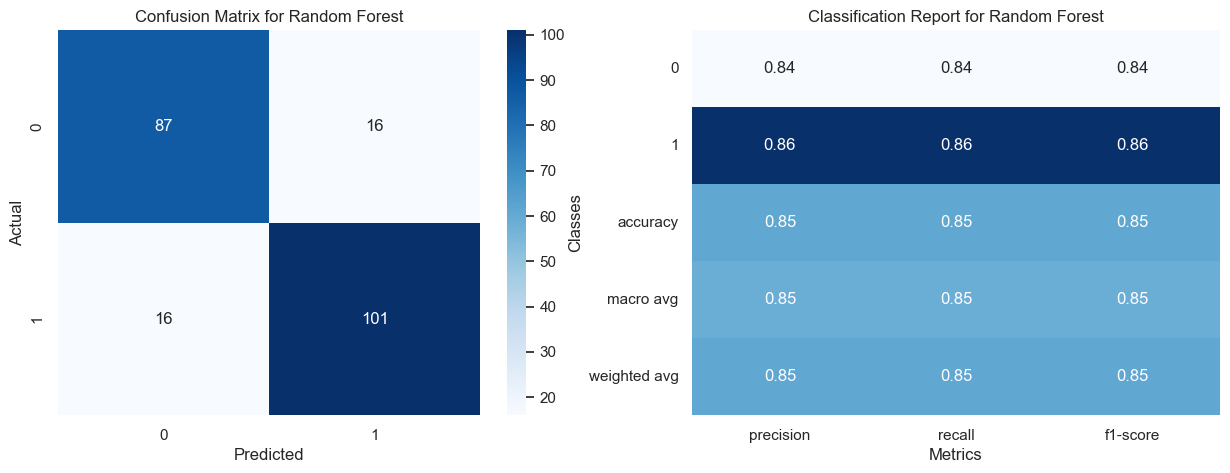

In [292]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model with the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = rf_model.predict(X_val)

# Calculate probabilities for the positive class on the validation data
y_val_proba = rf_model.predict_proba(X_val)[:, 1]

# Apply the function and store the metrics on the validation data
print_results(y_val, y_val_proba, y_val_pred, 'Random Forest', store_metrics=True)



The provided diagrams show various metrics for evaluating the performance of a Random Forest classification model. Here’s a brief summary based on the charts:

- **Confusion Matrix:** The confusion matrix reveals that the model correctly predicts Class 0 in 87 instances and Class 1 in 101 instances. There are 16 false positives (actual Class 0 but predicted as Class 1) and 16 false negatives (actual Class 1 but predicted as Class 0). These figures suggest the model has balanced accuracy across both classes.

- **Classification Report:** The report displays an accuracy of 0.85, meaning the model correctly classifies 85% of the cases overall. Precision, recall, and the F1-score are also comparable for both classes, indicating a balanced performance.

In the following, I visualized the performance of the Random Forest model using the predefined custom function called plot_model_performance. This function provides insights into the model's performance by displaying learning curves for both the training and validation sets. By plotting the training and validation accuracy scores against the number of training samples, we can assess whether the model is overfitting or underfitting. Additionally, the function utilizes cross-validation to obtain more reliable estimates of model performance. This visualization helps us understand how well the Random Forest model generalizes to unseen data and provides valuable insights for further model optimization and evaluation.

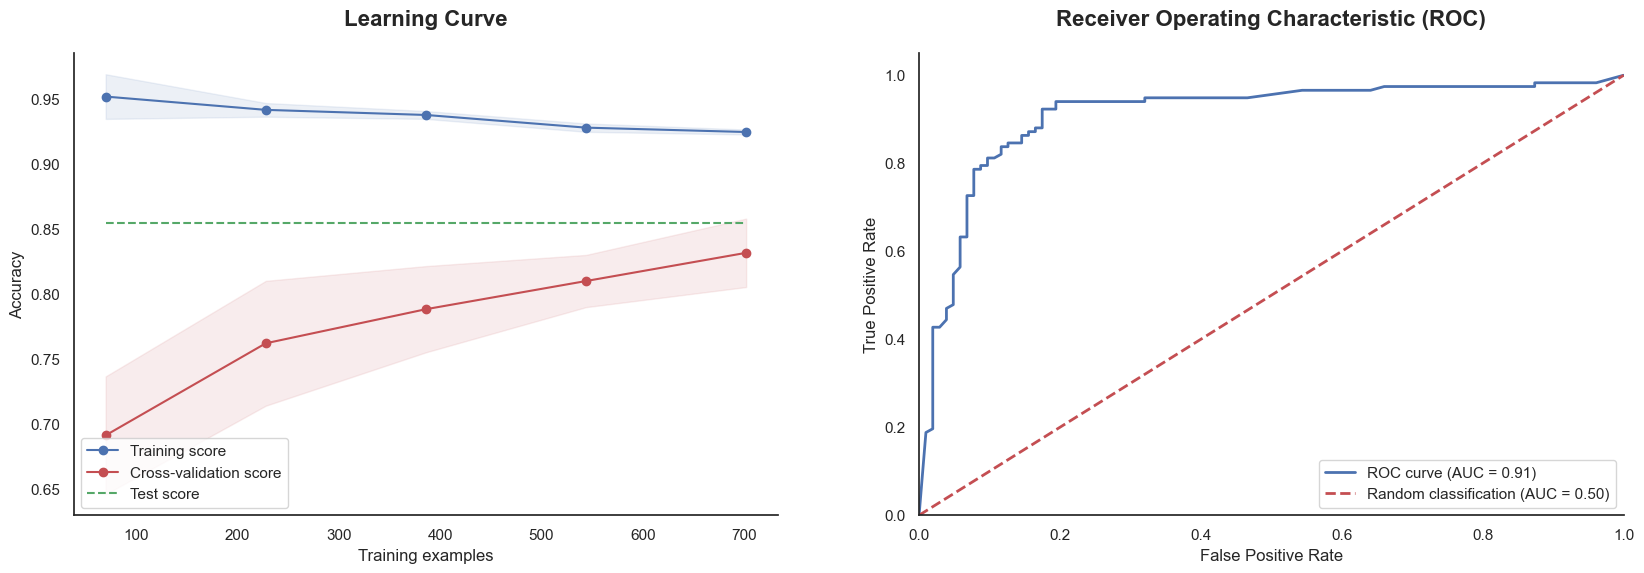

In [293]:
# Plot model performance
plot_model_performance(rf_model, X_train, y_train, X_val, y_val, cv=5)

- **Learning Curve:** The learning curve indicates that the training score and the cross-validation score converge as the number of training examples increases, suggesting the model is not overfitting. However, the shading around the cross-validation line shows some uncertainty or variability in model performance across different training sets.

- **Receiver Operating Characteristic (ROC):** The ROC curve demonstrates an area under the curve (AUC) of 0.91, which indicates very good discriminatory power of the model between the classes. An AUC of 0.91 is significantly better than random classification, which would have an AUC of 0.50.

In summary, the Random Forest model appears to perform robustly, with balanced precision and recall for both classes and strong discriminatory power as indicated by the high AUC. The learning curve suggests that the performance could potentially be improved further with more data or by adjusting the model complexity, as the validation score still lies below the training score.

#### **Tuning**

Afterwards, I conducted a thorough hyperparameter tuning process for the Random Forest model using GridSearchCV. This involved defining a parameter grid encompassing various combinations of hyperparameters such as **max_depth, min_samples_leaf, min_samples_split, and criterion**. I then utilized GridSearchCV to exhaustively search through these parameter combinations, evaluating each one using cross-validation. After fitting the GridSearchCV object to the training data, I identified the best combination of hyperparameters that yielded the highest cross-validated accuracy score. These optimal parameters serve as the configuration for our Random Forest model, ensuring that it is well-tuned and optimized for performance on our specific dataset.

In [294]:
# Parameter grid
param_grid = {
    'max_depth': [4, 8, 12, 16],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV object
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the model
grid.fit(X_train, y_train)

# Best parameters
print('Best parameters: ', grid.best_params_)


Fitting 5 folds for each of 128 candidates, totalling 640 fits


Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2}


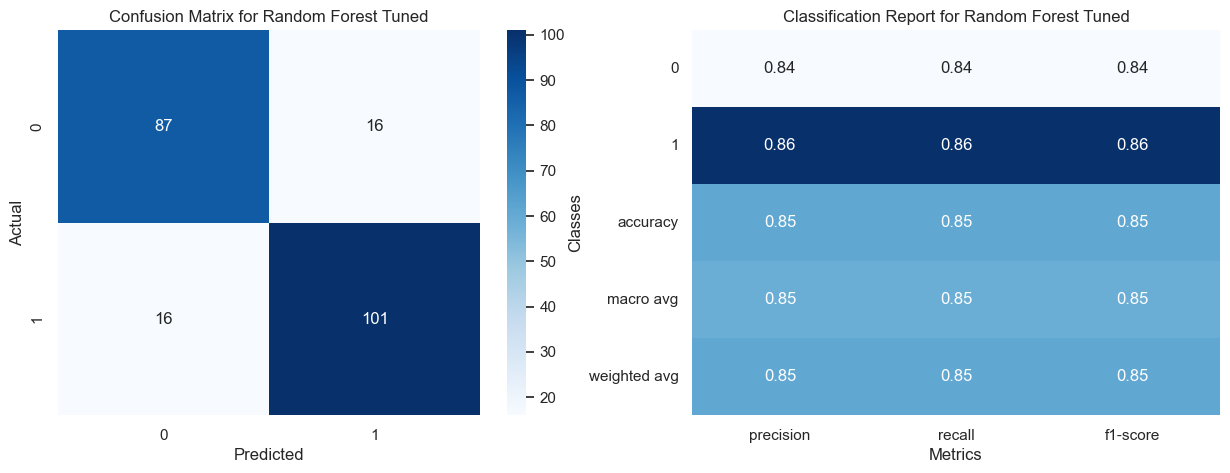

In [295]:
# Random Forest Classifier Object with tuned hyperparameters
rf_model_tuned = RandomForestClassifier(criterion='gini', 
                                        max_depth=12, 
                                        min_samples_leaf=2, 
                                        min_samples_split=2, 
                                        random_state=42)

# Fitting the model
rf_model_tuned.fit(X_train, y_train)

# Calculate probabilities for the positive class
y_val_proba = rf_model_tuned.predict_proba(X_val)[:, 1]

# Make predictions
y_val_pred = rf_model_tuned.predict(X_val)

# Apply the function and store the metrics
print_results(y_val, y_val_proba, y_val_pred, 'Random Forest Tuned', store_metrics=True)


The performance of the tuned Random Forest model shows no improvement over the basic model, which could be due to several reasons:

- **Effective Defaults:** The default hyperparameters of the Random Forest may already be well-suited to the dataset. It's possible that the algorithm's default settings are robust enough to handle the data effectively, resulting in little to no performance gain from tuning.

- **Model Limitations:** The Random Forest algorithm might have reached its performance ceiling with this particular dataset. Some datasets have a limit to how well they can be modeled, depending on the complexity and noise inherent in the data.

- **Hyperparameter Choices:** The selected hyperparameters for tuning might not have been the most impactful. Tuning might have focused on hyperparameters that don't contribute significantly to model performance for this dataset, or the ranges for tuning were not expansive enough to explore potentially better configurations.

- **Data Constraints**: The quality and characteristics of the dataset can limit the effectiveness of hyperparameter tuning. If the data is noisy, lacks variability, or the features do not have a strong predictive relationship with the target, improvements from tuning may be marginal.

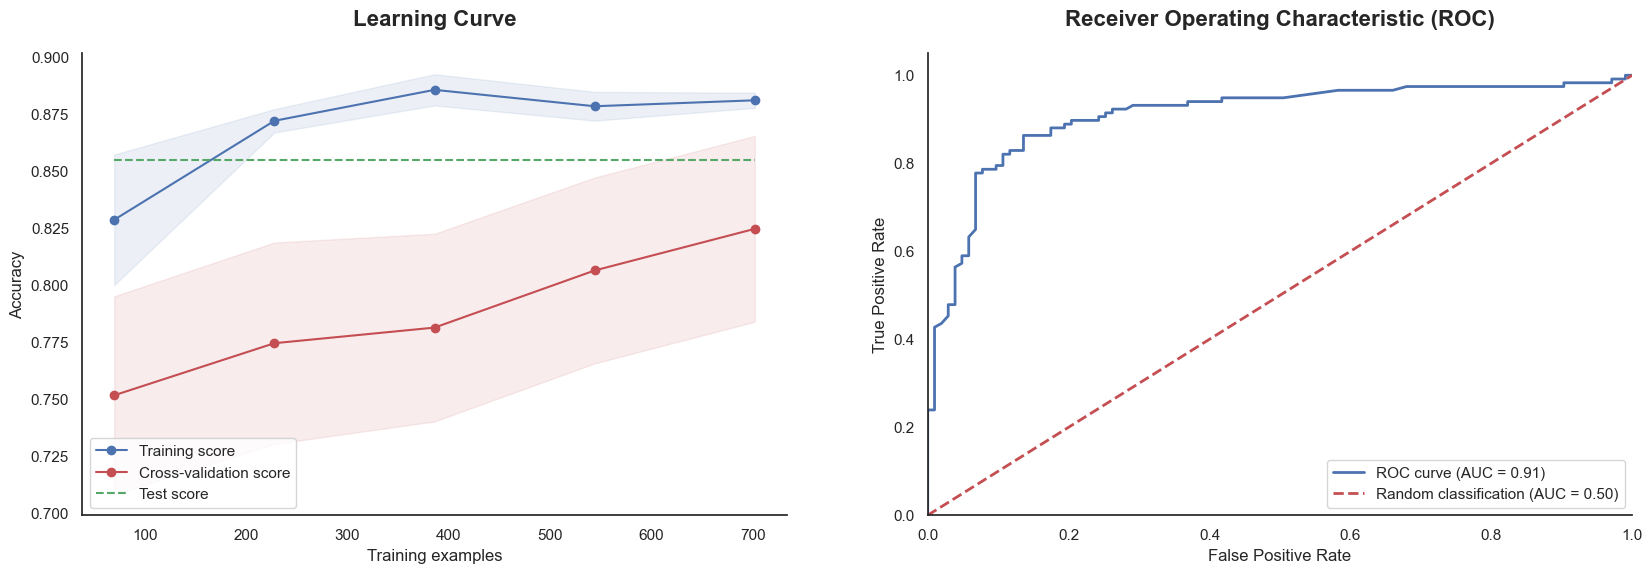

In [296]:
# Plot model performance
plot_model_performance(rf_model_tuned, X_train, y_train, X_val, y_val, cv=5)

#### **Feature Importance**


In the next step, we are invoking a function, plot_feature_importance, which is designed to visualize the importance of each feature used by the trained Random Forest model (rf_model_tuned) in predicting the target variable.

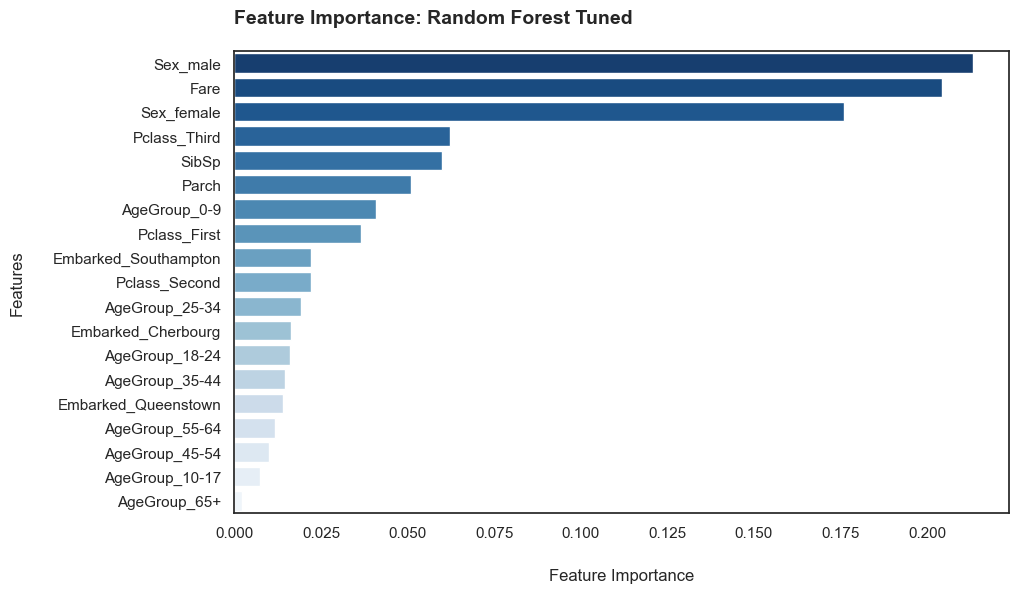

In [297]:
# Plot feature importances
plot_feature_importance(rf_model_tuned, preprocessor, numeric_features, categorical_features, 'Random Forest Tuned')


If we relate the feature importances to the survival rates on the Titanic, we can confirm the insights from our exploratory data analysis (EDA):

1. **Gender**: The 'Sex_male' feature has the highest importance, suggesting that males were less likely to survive, corroborating the historical accounts of the "women and children first" policy during lifeboat loading.

2. **Fare**: The 'Fare' feature suggests that passengers who paid higher fares, likely traveling in higher classes, had better chances of survival. This aligns with our EDA findings that wealthier passengers had better access to lifeboats and survival resources.

3. **Passenger Class**: 'Pclass_Third' as an important feature indicates that third-class passengers had a lower chance of survival, while 'Pclass_First' implies first-class passengers were more likely to survive, confirming our EDA insights about the impact of socioeconomic status on survival probability.

4. **Family Connections**: 'SibSp' and 'Parch', representing siblings/spouses and parents/children aboard, are moderately important. This means that those traveling with family may have had higher survival odds, likely due to group solidarity and shared resources.

5. **Age Groups**: The importance of the 'AgeGroup_0-9' suggests that children had a higher likelihood of survival, while importance diminishes with increasing age, which is consistent with our EDA findings that prioritized saving children.

6. **Embarkation Point**: Features like 'Embarked_Southampton' have some significance, indicating that the port of embarkation might have influenced survival rates, possibly due to differences in passenger composition or access to emergency resources.

In summary, the feature importance chart validates our EDA conclusions that demographics (gender and age), socioeconomic factors (fare and passenger class), and traveling with family were key determinants of survival on the Titanic.

### **DecisionTree**
#### **Basic Model**


The next step involves setting up, training, and evaluating a Decision Tree model to compare its performance to the previously examined Random Forest model. We start by initializing a DecisionTreeClassifier with a set seed for randomness to ensure reproducibility. Once the model is initialized, we train it using the training data X_train and y_train, allowing it to learn how to classify the data.

After training, the model calculates the probabilities that each instance in the validation set X_val belongs to the positive class (which, in the context of the Titanic dataset, would likely be survival). These probabilities are stored in y_val_proba_dt.

Next, we use the trained Decision Tree to make predictions on the same validation set, creating a prediction vector y_val_pred_dt. These predictions represent the model's best guess as to whether each individual survived or not, based on the learning from the training data.

Finally, we call a print_results function, passing in the true outcomes from the validation set y_val, the probability predictions y_val_proba_dt, and the class predictions y_val_pred_dt. The label 'Decision Tree' is used to identify this set of results. The store_metrics parameter indicates that we're not just printing the results for immediate inspection; we're also saving the model's performance metrics for further analysis. This could mean storing them in a log, a file, or a database for comparison against other models or for reference in future model iterations.

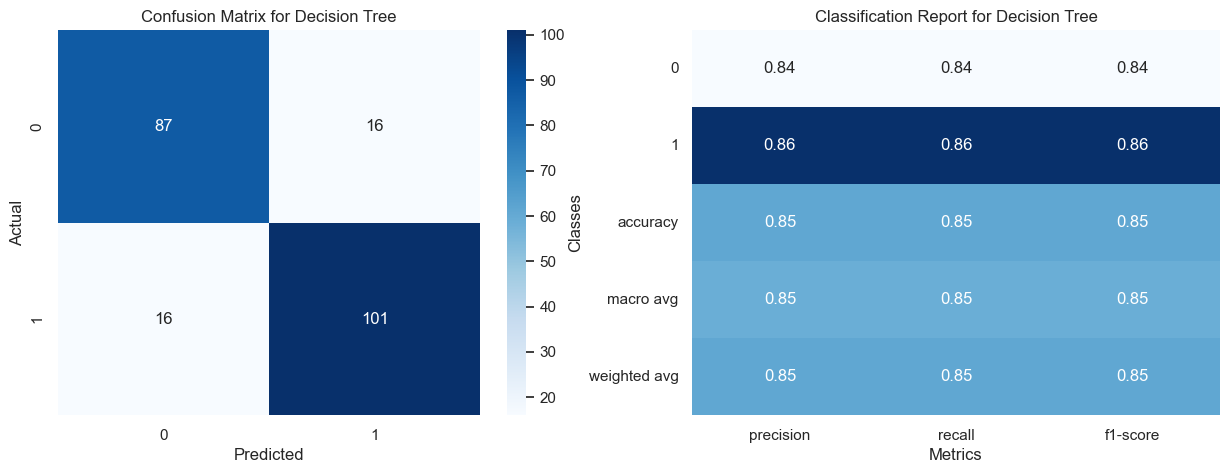

In [298]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Calculate probabilities for the positive class
y_val_proba_dt = dt_model.predict_proba(X_val)[:, 1]

# Predict on the validation set
y_val_pred_dt = dt_model.predict(X_val)

# Print results and store the metrics
print_results(y_val, y_val_proba_dt, y_val_pred_dt, 'Decision Tree', store_metrics=True)

Based on the provided diagrams for the Decision Tree model, here’s the evaluation:

- **Confusion Matrix:** The matrix displays 87 true negatives and 101 true positives, indicating the model’s accuracy in correctly classifying those who did not survive and those who did. It has 16 false positives and 16 false negatives, mirroring the performance of the Random Forest model.

- **Classification Report:** The classification report shows an overall accuracy of 0.85, with precision, recall, and the F1-score for both classes being similar to those of the Random Forest. This suggests that the Decision Tree has comparable predictive performance.

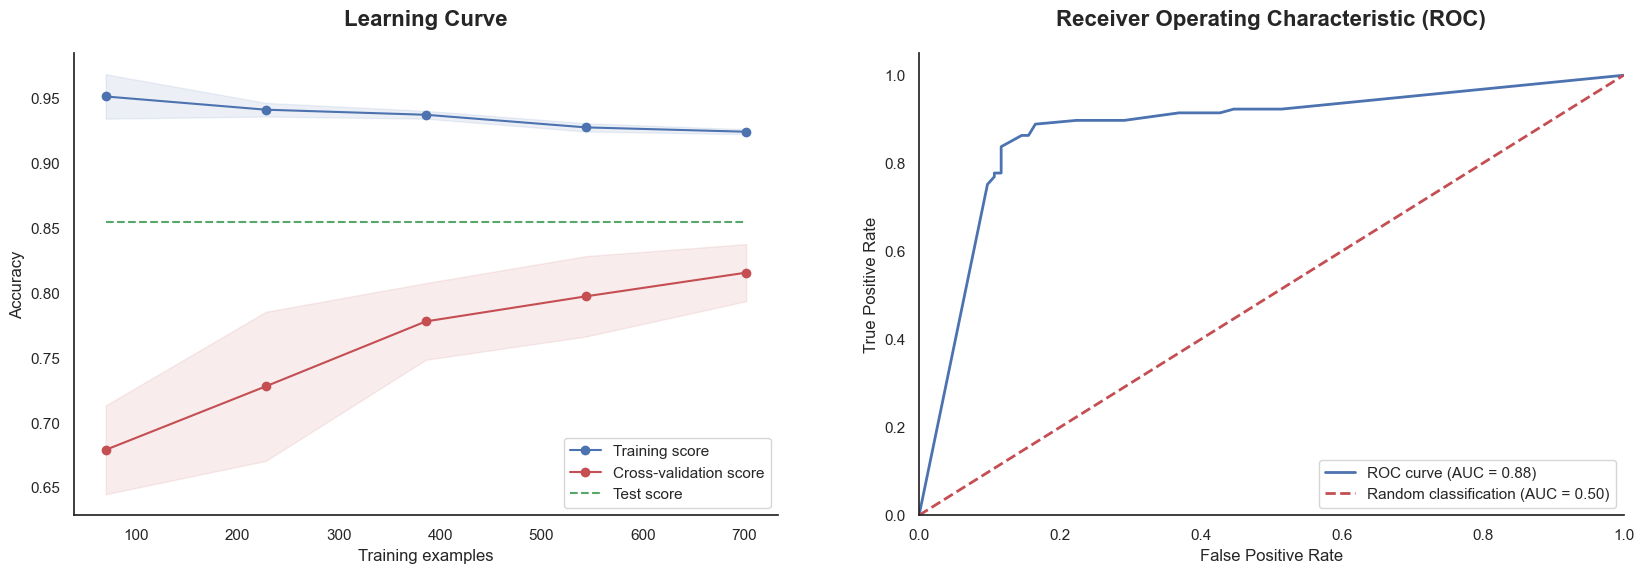

In [299]:
# Plot model performance
plot_model_performance(dt_model, X_train, y_train, X_val, y_val, cv=5)

- **Learning Curve:** The learning curve indicates a high training score that doesn't improve much with more data, and a cross-validation score that increases initially but then plateaus, suggesting potential overfitting as the model is not generalizing improvements from new data as effectively as desired.

- **ROC Curve:** The ROC curve shows an AUC of 0.88, which is a strong result but slightly lower than the Random Forest's AUC of 0.91. This indicates that the Decision Tree has a good, but not excellent, ability to distinguish between the positive and negative classes.

Overall, the Decision Tree model exhibits a good level of predictive accuracy and ability to distinguish between the classes, although it may not generalize as well as the Random Forest model and could be prone to overfitting given the shape of the learning curve. It confirms that a single Decision Tree might not capture the complexity of the data as well as an ensemble method like Random Forest.

#### **Tuning**


We're now embarking on a process to optimize our Decision Tree model by searching for the best combination of hyperparameters. This search will be comprehensive, covering a variety of options for the tree's maximum depth, minimum number of samples required at a leaf node, minimum number of samples required to split a node, and the function to measure the quality of a split (gini or entropy).

To carry out this optimization, we're using a technique called Grid Search coupled with Cross-Validation. Specifically, we're employing GridSearchCV, which will methodically train and evaluate a Decision Tree for each possible combination of hyperparameters in our defined grid, using a 5-fold cross-validation strategy. Cross-validation ensures that our model's performance is robust across different subsets of the training data, preventing overfitting to a particular part of the dataset.

The grid search operates in parallel, using all available CPU cores (n_jobs=-1) to expedite the process, and it's set to provide detailed progress updates (verbose=2). We're optimizing for accuracy, ensuring that the chosen hyperparameters yield the highest possible accuracy on the validation sets used during cross-validation.

Once the grid search is complete, we'll have a clear picture of which hyperparameters work best for our Decision Tree model as indicated by grid_dt.best_params_. This optimized model is expected to outperform our initial model with default hyperparameters, both in terms of accuracy and generalization to new data.

In [300]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Parameter grid for the Decision Tree model
param_grid_dt = {
    'max_depth': [4, 8, 12, 16],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
}

# GridSearchCV object for the Decision Tree model
grid_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_dt.fit(X_train, y_train)

# Print best parameters
print('Best parameters for Decision Tree: ', grid_dt.best_params_)


Fitting 5 folds for each of 128 candidates, totalling 640 fits


Beste Parameter für Decision Tree:  {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 8}



Having completed a thorough search involving 640 fits across 128 different candidate combinations using cross-validation, we've identified the optimal hyperparameters for our Decision Tree model. These parameters—using 'entropy' for the criterion, a max depth of 16, a minimum of 2 samples per leaf, and a minimum of 8 samples required to split an internal node—have been selected to maximize the model's performance.

Armed with these insights, we proceed to configure a new Decision Tree Classifier, dt_model_tuned, using the 'entropy' measure of quality for the splits, which considers the amount of information gain when making a split. The max_depth of 16 allows the tree to grow sufficiently complex to capture patterns in the data, while min_samples_leaf and min_samples_split are set to prevent overfitting by ensuring that splits and leaves represent more than just a few samples.

We then train this tuned classifier on our training set, X_train and y_train, to capture the underlying structure and relationships within our data.

Next, we utilize the fitted model to estimate the probabilities of instances in the validation set X_val belonging to the positive class, and to generate predictions as to which class each instance most likely belongs to.

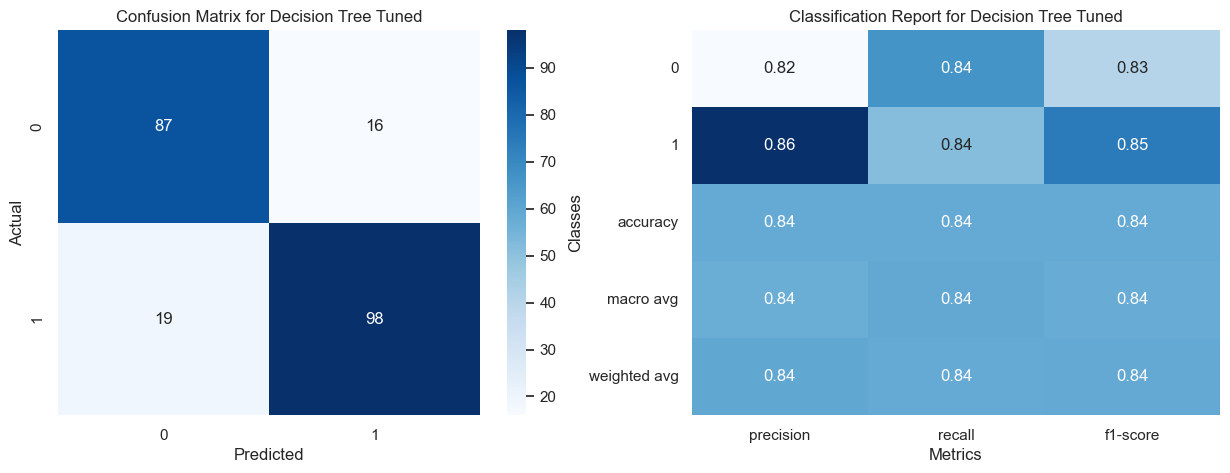

In [313]:

# Decision Tree Classifier Object with tuned hyperparameters
dt_model_tuned = DecisionTreeClassifier(criterion='entropy', 
                                        max_depth=16, 
                                        min_samples_leaf=2, 
                                        min_samples_split=8, 
                                        random_state=42)

# Fitting the model
dt_model_tuned.fit(X_train, y_train)

# Calculate probabilities for the positive class
y_val_proba = dt_model_tuned.predict_proba(X_val)[:, 1]

# Make predictions
y_val_pred = dt_model_tuned.predict(X_val)

# Apply the function and store the metrics
print_results(y_val, y_val_proba, y_val_pred, 'Decision Tree Tuned', store_metrics=True)


Evaluating the performance of the tuned Decision Tree model based on the diagrams:

- **Confusion Matrix:** The matrix indicates 87 true negatives and 98 true positives, with 19 false negatives and 16 false positives. This shows that the model is relatively balanced in terms of precision but could be slightly prone to underpredicting the positive class.

- **Classification Report:** The overall accuracy stands at 0.84, with precision, recall, and F1-scores hovering around similar values (0.82-0.86 for precision, 0.84 for recall, and 0.83-0.85 for F1-score across the classes). The model seems to have a consistent performance across these metrics, suggesting a good balance between sensitivity and specificity.

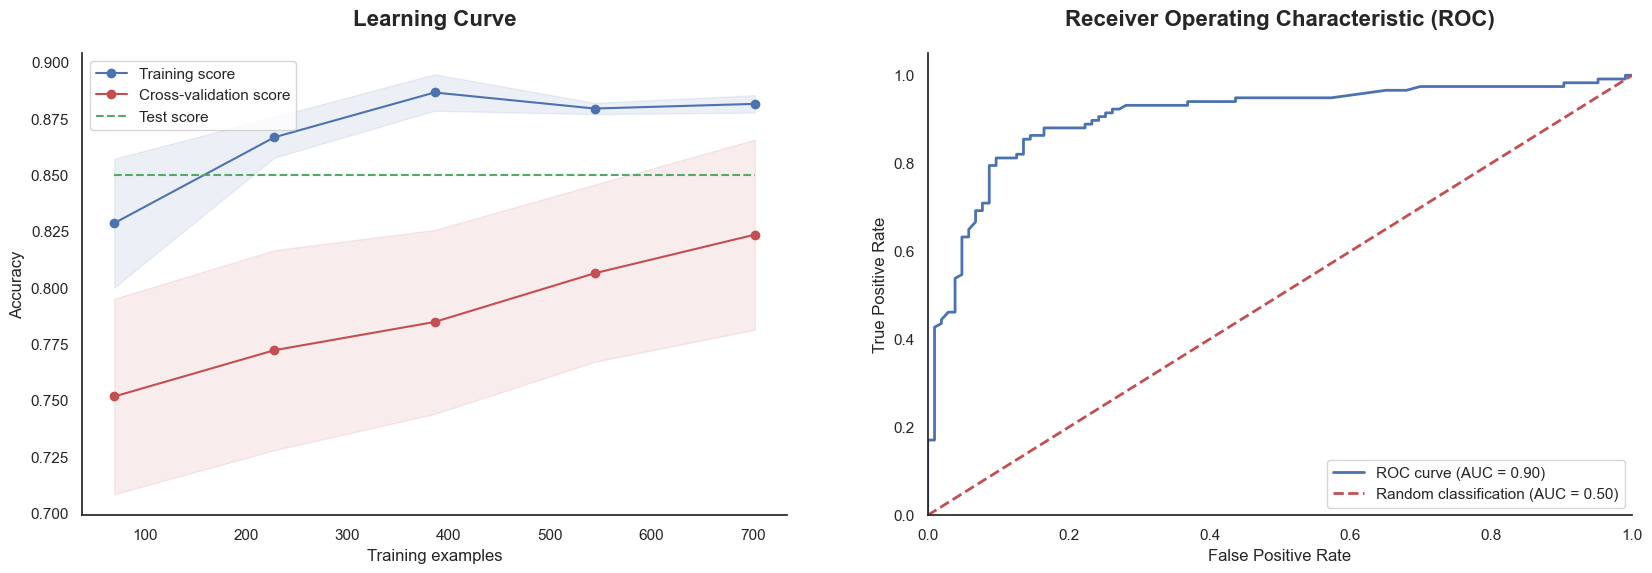

In [302]:
# Plot model performance
plot_model_performance(dt_model_tuned, X_train, y_train, X_val, y_val, cv=5)

- **Learning Curve:** The training score begins high and remains relatively stable with the addition of more training examples, while the cross-validation score increases with more data, indicating good generalization. However, there is still a noticeable gap between the training and cross-validation scores, suggesting some overfitting.

- **ROC Curve:** The ROC curve presents an AUC of 0.90, which is commendable. It suggests that the model has a high true positive rate and a relatively low false positive rate, denoting a strong ability to distinguish between the classes.

Overall, the tuned Decision Tree model exhibits a solid performance with a slight indication of overfitting, as observed in the learning curve. The high AUC value demonstrates its strong discriminatory power. Despite the relatively small number of false positives and false negatives, the slight increase in false negatives compared to the previous model suggests there may be room for further refinement, possibly by adjusting the balance between complexity (as governed by max_depth) and simplicity (as controlled by min_samples_leaf and min_samples_split).

#### **Feature Importance**

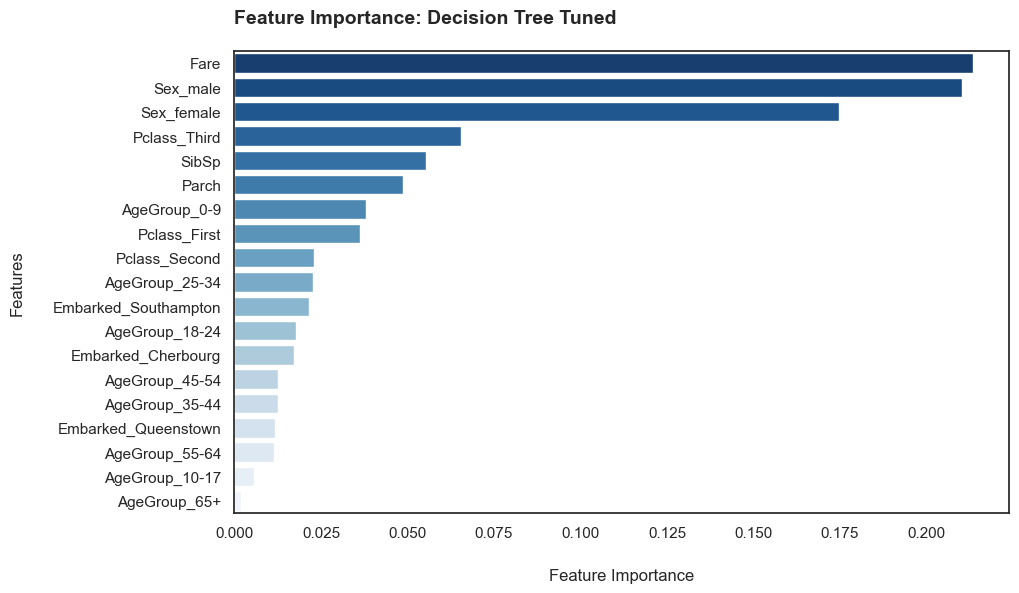

In [303]:
# Plot feature importances
plot_feature_importance(dt_model_tuned, preprocessor, numeric_features, categorical_features, 'Decision Tree Tuned')


The bar chart visualizes the feature importances determined by the tuned Decision Tree model. Here’s what we can infer:

- **Fare:** The fare appears to be the most significant predictor. This could indicate that passengers who paid more for their tickets, likely correlating with higher socio-economic status, had higher survival rates.
- **Gender:** Following fare, gender is highly influential, with 'Sex_male' and 'Sex_female' as key predictors, suggesting a considerable difference in survival rates between men and women.
- **Passenger Class:** 'Pclass_Third' is an important feature, potentially indicating a lower survival rate for third-class passengers. This might reflect the historical accounts where lower-class passengers had less access to lifeboats.
- **Family Relationships:** 'SibSp' and 'Parch' show moderate importance, implying that the number of siblings/spouses and parents/children on board had a notable impact on survival chances.
- **Age:** Young children ('AgeGroup_0-9') are shown as important, aligning with the policy of giving priority to children during lifeboat allocation.
- **Ticket Class:** The first and second ticket classes also feature, although they are less important than the third, suggesting that while class was a factor, the strongest effect was seen in the lower class.
- **Embarkation Ports:** Ports of embarkation ('Embarked_Southampton', 'Embarked_Cherbourg', 'Embarked_Queenstown') have varying degrees of influence, which might reflect the socio-economic demographics of passengers embarking at different locations.

### **XGBoost**
#### **Basic Model**


Lastly, we try a basic XGBoost model, a potent gradient boosting framework. Without fine-tuning any hyperparameters, we'll use the default settings to first train the model on our X_train and y_train data. Once trained, the model's next task is to assess the validation set X_val. It will calculate the probability for each instance belonging to the positive class, essential for performance metrics like ROC curves.

With the probabilities in hand, the model will make its predictions. These predictions will indicate whether the model believes each instance in the validation set is more likely to belong to the positive or negative class.

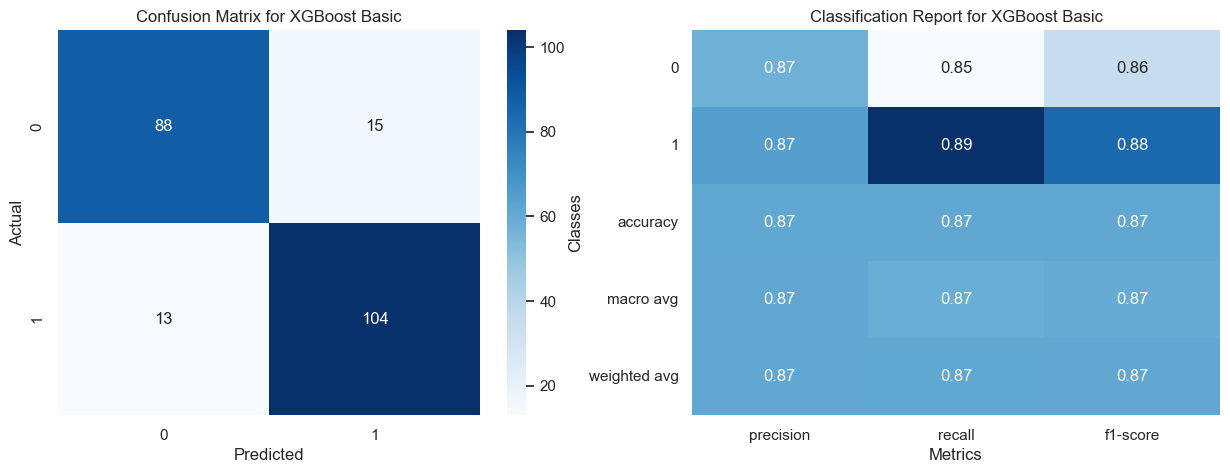

In [304]:
# Initialize and train the XGBoost model
xgb_basic = XGBClassifier()
xgb_basic.fit(X_train, y_train)

# Calculate probabilities for the positive class
y_val_proba = xgb_basic.predict_proba(X_val)[:, 1]

# Make predictions
y_val_pred = xgb_basic.predict(X_val)

# Print results
print_results(y_val, y_val_proba, y_val_pred, 'XGBoost Basic')


The performance of the XGBoost Basic model can be assessed based on the metrics above:

- **Confusion Matrix:** The matrix shows 88 true negatives and 104 true positives, with 15 false positives and 13 false negatives. This indicates the model has a high accuracy rate with a slightly better prediction rate for the positive class.

- **Classification Report:** The model achieves an overall accuracy of 0.87, which is quite high. The precision, recall, and F1-scores are all above 0.85 for both classes, indicating a balanced performance on both the positive and negative classes.

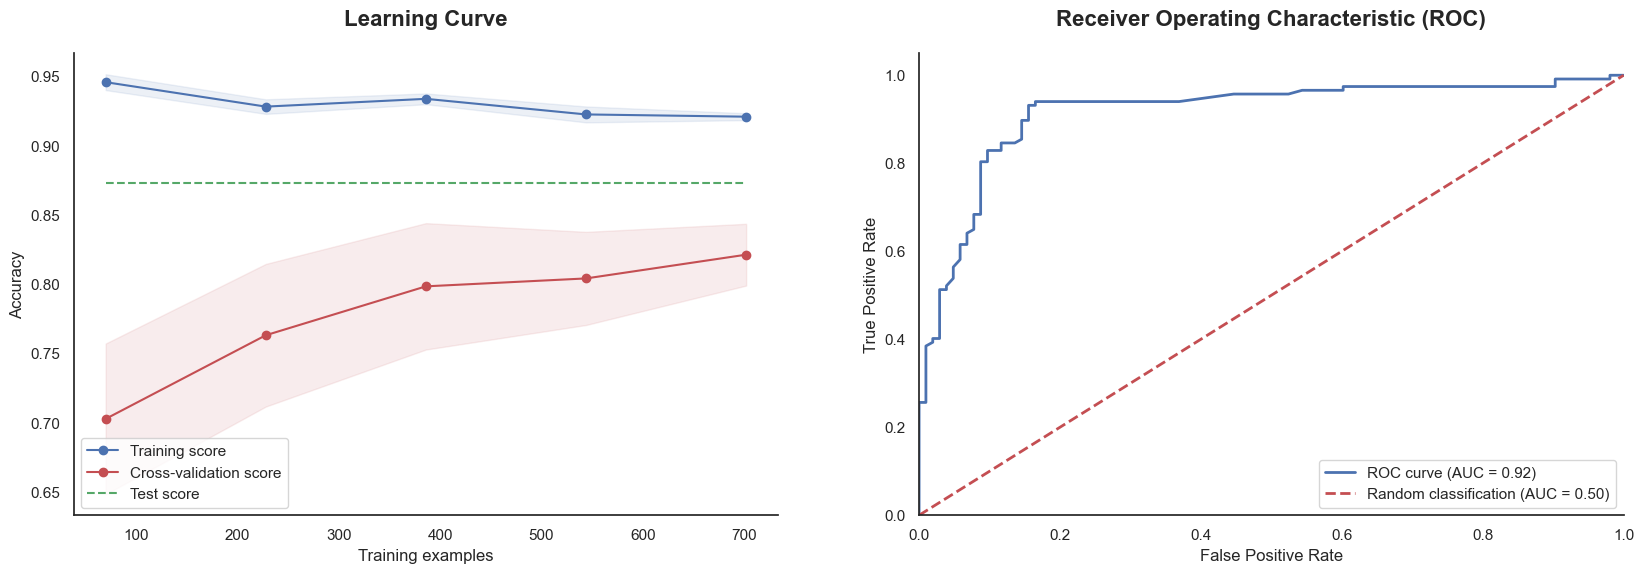

In [305]:
# Plot model performance
plot_model_performance(xgb_basic, X_train, y_train, X_val, y_val, cv=5)

- **Learning Curve:** The training accuracy is high and remains stable with the addition of more training examples, while the cross-validation accuracy increases but then plateaus, suggesting that the model is generalizing well but could be beginning to overfit as it doesn't improve with additional data.

- **ROC Curve:** The ROC curve yields an AUC of 0.92, which is excellent and signifies that the model has a strong ability to differentiate between the positive and negative classes.

In summary, the basic XGBoost model exhibits strong predictive performance with a high degree of accuracy, good balance between precision and recall, and excellent discriminative ability. The high AUC indicates that the probability scores for the positive class are well calibrated. The slight difference between training and cross-validation scores suggests there might be room for improvement, potentially by hyperparameter tuning to further optimize model performance and prevent overfitting.

#### **Tuning**


For  fine-tuning,we use an XGBoost classifier by implementing a grid search to explore a range of hyperparameters. The XGBoost model is set to optimize 'logloss' during training, avoiding the use of a label encoder. We'll conduct a comprehensive search across combinations of the number of trees, learning rate, tree depth, and minimum child weight using a GridSearchCV process with 5-fold cross-validation to ensure the model's robustness. This grid search is configured to run in parallel across all available cores for efficiency and will assess the model's accuracy. Once the grid search completes, it will determine the most accurate set of hyperparameters, which we'll review to understand the best configuration for our XGBoost model’s performance on the training data.

In [306]:
# Initialize XGBoost Classifier with custom parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5]
}

# GridSearchCV object for XGBoost
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_xgb.fit(X_train, y_train)

# Print best parameters
print('Best parameters for XGBoost: ', grid_xgb.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


Beste Parameter für XGBoost:  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200}


After completing a grid search for the XGBoost model with a substantial number of fits—405 across 81 different combinations of hyperparameters—we've landed on the best parameters for our predictive task. These are a learning rate of 0.1, a max depth of 4 for the trees, a minimum child weight of 1, and an estimator count of 200. This suggests a balanced approach to learning with a moderate learning rate and depth to prevent overfitting while using a substantial number of trees for the ensemble.

Now, we take these optimal parameters and initialize an XGBoost classifier, xgb_model_tuned, with them. This model is then trained (fit) on our training dataset, X_train and y_train, to create a tuned model ready to make predictions.

Once the model is trained, we calculate the probability of each instance in the validation set, X_val, belonging to the positive class (which could represent a case like a customer making a purchase, a patient having a particular disease, etc., depending on the context of the dataset).

We follow that by using our tuned model to make predictions on the validation set, assigning each instance to the most likely class.

Lastly, we apply a print_results function to output the model's performance metrics, such as accuracy, precision, recall, and F1 score, comparing the predicted values, y_val_pred, against the actual values, y_val. We also store these metrics for later analysis, perhaps to compare against other models or for reporting purposes.

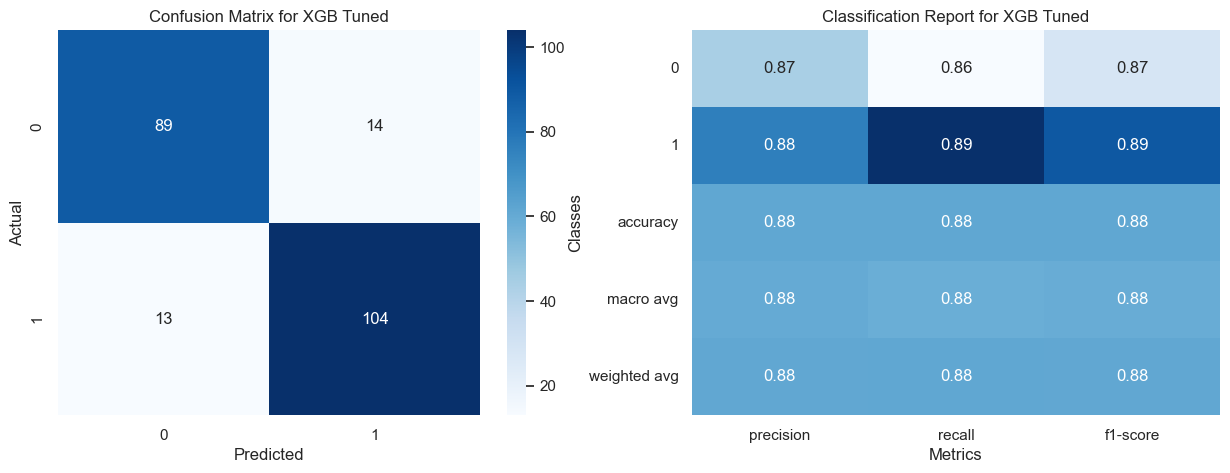

In [307]:

# XGB Classifier Object with tuned hyperparameters
xgb_model_tuned = XGBClassifier(learning_rate=0.1, 
                                 n_estimators=200,
                                 min_child_weight=1,
                                 max_depth=4)

# Fitting the model
xgb_model_tuned.fit(X_train, y_train)

# Calculate probabilities for the positive class
y_val_proba = xgb_model_tuned.predict_proba(X_val)[:, 1]

# Make predictions
y_val_pred = xgb_model_tuned.predict(X_val)

# Apply the function and store the metrics
print_results(y_val, y_val_proba, y_val_pred, 'XGB Tuned', store_metrics=True)

The tuned XGBoost model's performance is summarized by the following key metrics:

- **Confusion Matrix:** The matrix shows a solid prediction with 89 true negatives and 104 true positives, alongside a relatively low number of false positives (14) and false negatives (13). This balance demonstrates the model's accurate classification ability.

- **Classification Report:** The report displays an overall accuracy of 0.88, with precision, recall, and F1-scores all around 0.87-0.89 for both classes, signifying a high level of accuracy and balance between detecting positive and negative classes.



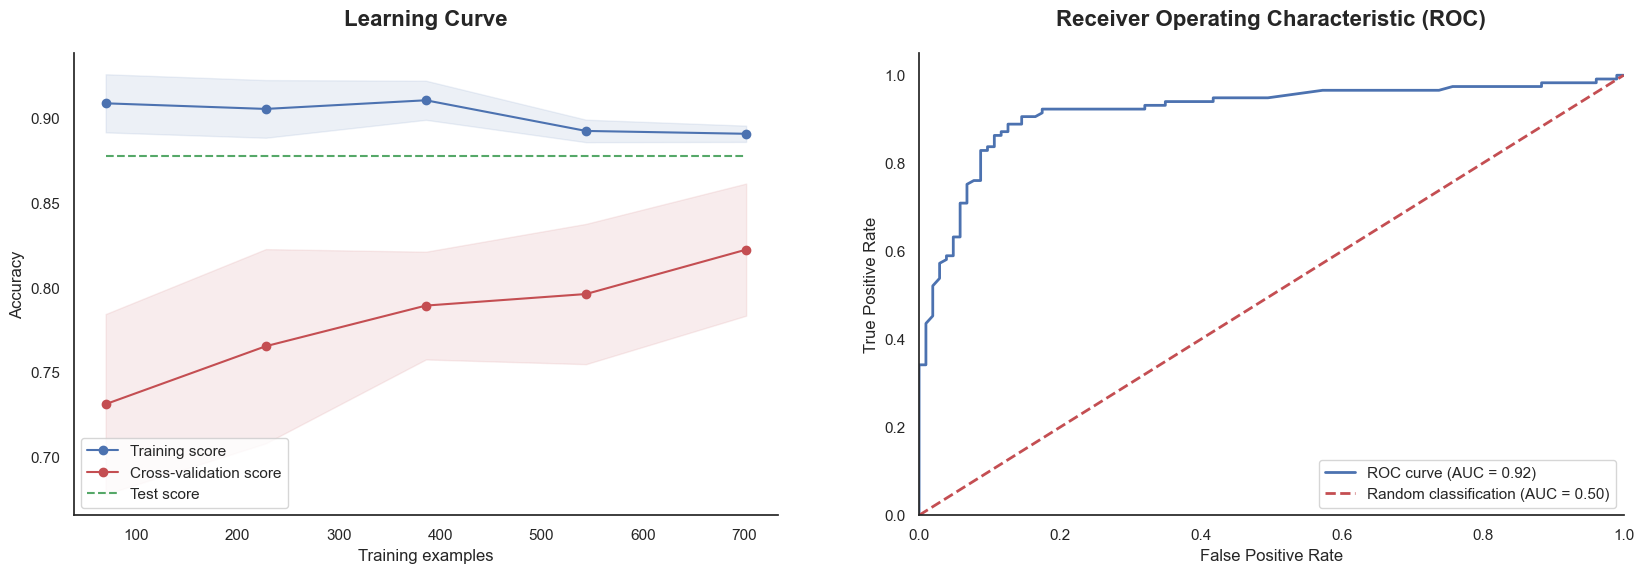

In [308]:
# Plot model performance
plot_model_performance(xgb_model_tuned, X_train, y_train, X_val, y_val, cv=5)

- **Learning Curve:** The learning curve shows that the training score remains relatively high as more data is added, with the cross-validation score slightly lower but improving, suggesting good model generalization. The gap between the training and cross-validation scores indicates a small amount of overfitting.

- **ROC Curve:** An AUC of 0.92 is achieved, which is excellent, reflecting the model's strong discriminative power between the positive and negative classes.

In summary, the tuned XGBoost model presents a high-performance profile with robust predictive accuracy, a high degree of consistency across various metrics, and effective discrimination between classes. The learning curve and AUC support the model's capability to generalize well on unseen data, although the slight gap in the learning curve could be a signal for potential overfitting, which might be addressed with further tuning or regularization.

#### **Feature Importance**

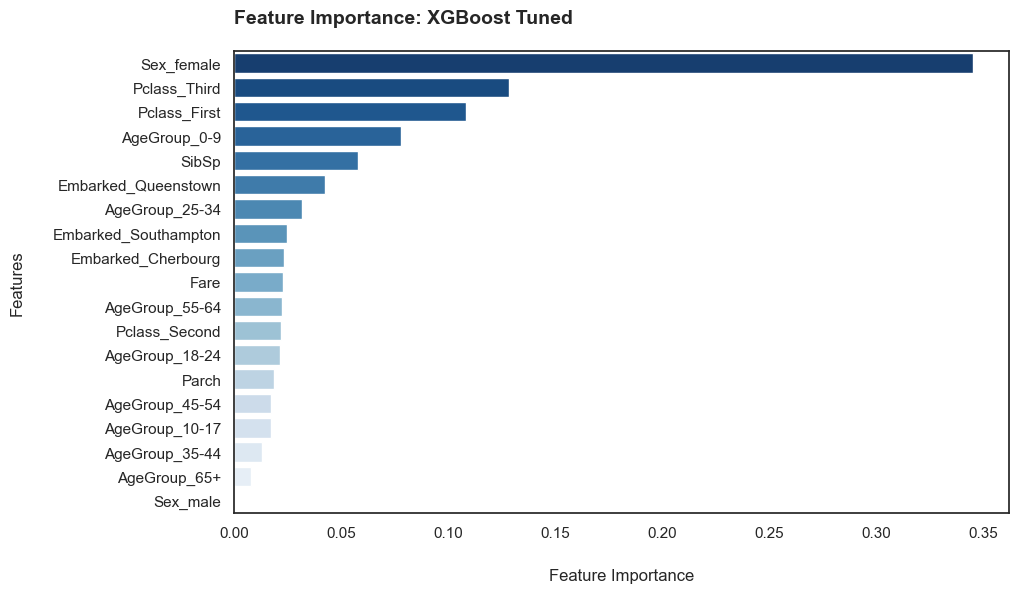

In [309]:
# Plot feature importances
plot_feature_importance(xgb_model_tuned, preprocessor, numeric_features, categorical_features, 'XGBoost Tuned')


At last we have a also have a look on the feature importance from the tuned XGBoost model, showing which features the model found most influential in predicting the target outcome:

- **Sex_female:** Being female is the most important feature, indicating a strong correlation with the target variable, likely reflecting the historical survival advantage women had during the Titanic disaster.

- **Passenger Class:** 'Pclass_Third' and 'Pclass_First' are next in importance. This suggests significant differentiation in survival rates between the upper and lower classes aboard the Titanic, with third-class passengers having less chance of survival.

- **Age Groups:** Young children (AgeGroup_0-9) are particularly highlighted, in line with historical accounts that children were given priority in life-saving efforts.

- **Family Connections:** The number of siblings/spouses ('SibSp') appears to have a moderate impact on survival outcomes, reflecting the importance of family size or connections in the model's predictions.

- **Embarkation Points:** Different embarkation points ('Embarked_Queenstown', 'Embarked_Southampton', and 'Embarked_Cherbourg') show varying degrees of importance, possibly indicative of the socio-economic background or cabin location on the ship.

- **Fare:** Interestingly, fare, which often correlates with passenger class, is lower in importance compared to other features, suggesting that once class and other factors are accounted for, the additional information provided by the fare is less significant.

- **Age and Gender:** Various age groups are featured throughout, with importance diminishing for middle to older ages. Notably, 'Sex_male' is the least important feature, which may be due to the 'Sex_female' feature already capturing the gender effect.

### **Model Comparison**

To compare the performance metrics of various models, we are using a heatmap in the following which allows us to assess, in a single view, how each model ranks according to the metrics provided, facilitating an easy-to-understand of model performances.

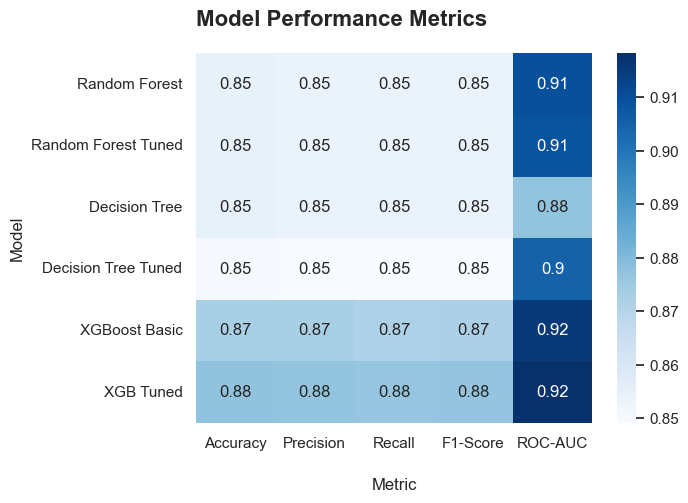

In [310]:
# Heatmap with gradient colors for metrics
sns.heatmap(model_metrics.iloc[:, 1:], annot=True, cmap='Blues', yticklabels=model_metrics['Model'])

# Labels
plt.xlabel('Metric', labelpad=20)
plt.ylabel('Model')
plt.title("Model Performance Metrics", fontsize=16, fontweight="bold", pad=20, loc="left")

# Display
plt.show()

- **Random Forest & Tuned Random Forest:** Both models have consistent scores across accuracy, precision, recall, and F1-score, each metric at 0.85. They also share an ROC-AUC of 0.91, indicating strong discriminative ability.

- **Decision Tree:** It shows uniform scores (0.85) across all metrics except for ROC-AUC, which is slightly lower at 0.88.

- **Tuned Decision Tree:** Similar to the basic Decision Tree in metrics but with a marginally higher ROC-AUC of 0.9, suggesting slight improvement after tuning.

- **XGBoost Basic:** Exhibits slightly higher scores for accuracy, precision, recall, and F1-score (0.87) than the Decision Tree models and matches the Random Forests with an ROC-AUC of 0.92.

- **Tuned XGBoost:** Tops the chart with the highest accuracy, precision, recall, and F1-score of 0.88, and an ROC-AUC equal to the basic XGBoost at 0.92.

Overall, while all models perform well, the Tuned XGBoost stands out with the best performance across all evaluated metrics, suggesting that the tuning process provided a beneficial refinement. The high ROC-AUC scores for both XGBoost models emphasize their strong classification capabilities. It's noteworthy that tuning has not significantly changed the Random Forest's performance, indicating either an already optimized base model or a saturation point in the model's ability to learn from the data given the feature set and data representation.








### **Submission**

In the last step, we create a copy of the test data for reference and initiate the preprocessing phase by repeating all steps taken for our training dataset exept random oversampling.

Subsequently, we prepare the features by applying the preprocessing pipeline to the cleaned test data, resulting in the features (X_test) being formatted correctly for model prediction.

Finally, we utilize the trained and optimized XGBoost model to predict outcomes on the test data. 

In [311]:
# Create a copy of test data
df_test_original = df_test.copy()

# Preprocess test data
df_test['Embarked'].fillna(mode_embarked, inplace=True)  # Use the mode from the training set
df_test['Age'] = df_test['Age'].replace(np.nan, df_test['Age'].median(axis=0))  # Use the median from the training set
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels, right=False)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median()).astype(int)  # Impute with median if needed and convert to int
df_test = df_test.drop(['Cabin', 'PassengerId', 'Ticket', 'Name', 'Age'], axis=1)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)
df_test['Pclass'] = df_test['Pclass'].map(pclass_mapping)
for col, dtype in convert_dict.items():
    if col in df_test:  # Skip 'Survived' as it's not in the test set
        df_test[col] = df_test[col].astype(dtype)

# Prepare features for prediction
X_test = preprocessor.transform(df_test)

# Predict using the trained model
predictions = xgb_model_tuned.predict(X_test)

# Prepare the submission file
submission_kaggle = pd.DataFrame({
    'PassengerId': df_test_original['PassengerId'],  # df_test_original should be your original test dataset with 'PassengerId'
    'Survived': predictions
})
submission_kaggle.to_csv('../data/titanic_predictions.csv', index=False)

# Read the submission file and display basic information
submission_df = pd.read_csv("../data/titanic_predictions.csv")
display(submission_df.head())
print(submission_df.info())



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


## **Conclusion**

### **Model Performance**

The analysis of various machine learning models highlights their effectiveness in understanding the survival factors during the Titanic disaster. Here's an updated summary of model performance:

- **Random Forest & Random Forest Tuned**: Both models achieved an accuracy of 0.85, showing balanced metrics across classes. They reflect an adequate understanding of survival determinants without over-emphasizing any particular insights from earlier analyses.

- **Decision Tree & Decision Tree Tuned**: There's a slight improvement in recall for the '1' class post-tuning, which enhances its ability to identify survivors, aligning better with survival determinants.

- **XGBoost Basic & XGBoost Tuned**: These models excel, with the tuned version achieving the **highest accuracy of 0.88** and an impressive **AUC score of 0.92**. This confirms the XGBoost's robust predictive power and its alignment with key survival factors.

- **Overfitting and Underfitting**: The convergence of training and cross-validation scores indicates a well-fitting model without signs of overfitting or underfitting, suggesting that the models have effectively learned from the data.

- **ROC Curves**: The high AUC scores, particularly for the XGBoost models, demonstrate strong discriminative ability, which is crucial for accurate survival predictions.

These models could still benefit from further optimization, particularly through refined feature engineering and more strategic data use.

### **Insights from Feature Importances**

The tuned models' feature importance evaluations underscore the relevance of certain attributes:

1. **Gender Impact**: 'Sex_male' and 'Sex_female' are top features, confirming the significant role of gender in survival chances.

2. **Socioeconomic Status**: 'Fare' and 'Pclass' are crucial, highlighting how socio-economic factors influence survival odds.

3. **Family Size**: 'SibSp' and 'Parch' are important features, aligning with historical data that family size impacted survival likelihood.

4. **Age Groups**: 'AgeGroup_0-9' stands out in the models, reflecting the historical priority given to children during life-saving efforts.

5. **Embarkation Points**: The importance of different embarkation points like 'Embarked_Southampton', 'Embarked_Cherbourg', and 'Embarked_Queenstown' illustrates variations in passenger demographics and their socio-economic backgrounds.

6. **Model Differences**: Although models vary in how they prioritize features, all consistently identify the key factors, suggesting robustness in their feature handling.

Overall, these insights not only affirm the models' alignment with the historical context and previous analyses but also offer avenues for further enhancing the predictive accuracy through targeted data preprocessing and feature refinement.
